In [2]:
import pandas as pd
import toad


In [3]:
df = pd.read_csv(r'I:\PYTHON\AI_datamining\src\data\previous_application_ft_cleaned_fillna.csv')

In [32]:
from sklearn.model_selection import train_test_split
x = df.drop('TARGET',axis=1)
y = df['TARGET']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

In [33]:
x_train_stp,drop_list = toad.selection.select(x_train,
target=y_train,
                                                  empty=0.5,
                                                  iv=0.05,
                                                  corr=0.7,
                                                  return_drop=True,
                                                  exclude='SK_ID_CURR')
print('保留特征:',x_train_stp.shape[1],'缺失删除:',len(drop_list['empty']),'低iv删除：',len(drop_list['iv']),'高相关删除：',len(drop_list['corr']))
x_train_stp.shape

保留特征: 22 缺失删除: 0 低iv删除： 248 高相关删除： 7


(246008, 22)

In [35]:
x_test_stp = x_test[x_train_stp.columns]
x_test_stp.head()

,SK_ID_CURR,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,...,ORGANIZATION_TYPE,PAYMENT_RATE,DAYS_FIRST_DRAWING_SUM,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_SUM,Pass_rate,581D_Number_of_Refused,581D_CODE_REJECT_REASON_MAX,1300D_R_Total_historical_application,1300D_NAME_YIELD_GROUP_MAX
83449,196790,-15095,-2078.0,2,270000.0,-1.000000,0.360971,0.166406,-628.0,Working,...,Business Entity Type 3,0.050000,-2.0,-298.500000,-267.0,2.000000,1.0,LIMIT,281430.0,low_normal
281010,425582,-19593,-550.0,2,459000.0,-1.000000,0.357342,-1.000000,-2415.0,Working,...,Self-employed,0.029477,-4.0,-1350.750000,-4203.0,0.000000,0.0,XAP,0.0,middle
53194,161604,-16301,-1249.0,2,270000.0,-1.000000,0.704229,0.186293,-1046.0,Working,...,Self-employed,0.050000,-1.0,-1015.000000,-745.0,0.000000,0.0,0,0.0,middle
173559,301131,-14808,-1.0,1,1125000.0,0.738711,0.759667,0.821443,-3610.0,Pensioner,...,-1,0.029356,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1,-1.0,-1
281352,425942,-16954,-1969.0,2,405000.0,0.498332,0.645569,-1.000000,-1062.0,Commercial associate,...,Industry: type 3,0.050000,-11.0,-319.090909,-1650.0,1.571429,4.0,XAP,450000.0,-1


In [85]:
combiner = toad.transform.Combiner()
combiner.fit(x_train_stp,y_train,method='chi',min_samples=0.05,exclude='SK_ID_CURR')
bins = combiner.export()
bins


{'DAYS_BIRTH': [-19865, -13426],
 'DAYS_EMPLOYED': [-4650.0, -3101.0, -2447.0, -1721.0, -1054.0, -495.0, -1.0],
 'REGION_RATING_CLIENT_W_CITY': [2, 3],
 'AMT_GOODS_PRICE': [283500.0, 409500.0, 450234.0, 675382.5],
 'EXT_SOURCE_1': [0.014568132, 0.26760826, 0.42328972, 0.62036115],
 'EXT_SOURCE_2': [0.14285749,
  0.27260786,
  0.38463876,
  0.46354237,
  0.5342801,
  0.6150905,
  0.6760258,
  0.7315164],
 'EXT_SOURCE_3': [0.00052726525, 0.24585122, 0.344155, 0.5064842, 0.70470643],
 'DAYS_LAST_PHONE_CHANGE': [-2019.0, -1122.0, -770.0, -5.0],
 'NAME_INCOME_TYPE': [['Pensioner', 'State servant', 'Student'],
  ['Commercial associate'],
  ['Working', 'Businessman', 'Unemployed', 'Maternity leave']],
 'NAME_EDUCATION_TYPE': [['Academic degree', 'Higher education'],
  ['Incomplete higher', 'Secondary / secondary special', 'Lower secondary']],
 'OCCUPATION_TYPE': [['Accountants',
   'IT staff',
   'Managers',
   'High skill tech staff',
   'Core staff',
   'Private service staff',
   '-1',
   

In [10]:
x_train_stp.head()

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,AMT_GOODS_PRICE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,...,ORGANIZATION_TYPE,PAYMENT_RATE,DAYS_FIRST_DRAWING_SUM,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_SUM,Pass_rate,581D_Number_of_Refused,581D_CODE_REJECT_REASON_MAX,1300D_R_Total_historical_application,1300D_NAME_YIELD_GROUP_MAX
0,100002,1,-9461,-637.0,2,351000.0,0.083037,0.262949,0.139376,-1134.0,...,Business Entity Type 3,0.060749,-1.0,-565.000000,125.0,0.0,0.0,0,0.0,low_normal
1,100003,0,-16765,-1188.0,1,1129500.0,0.311267,0.622246,-1.000000,-828.0,...,School,0.027598,-3.0,-1274.333333,-3013.0,0.0,0.0,0,0.0,low_normal
2,100004,0,-19046,-225.0,2,135000.0,-1.000000,0.555912,0.729567,-815.0,...,Government,0.050000,-1.0,-784.000000,-694.0,0.0,0.0,0,0.0,middle
3,100006,0,-19005,-3039.0,2,297000.0,-1.000000,0.650442,-1.000000,-617.0,...,Business Entity Type 3,0.094941,-6.0,-163.333333,1090.0,1.2,1.0,XAP,688500.0,low_normal
4,100007,0,-19932,-3038.0,2,513000.0,-1.000000,0.322738,-1.000000,-1106.0,...,Religion,0.042623,-6.0,-1052.833333,-4187.0,0.0,0.0,XAP,0.0,middle


In [14]:
x_train_stp2=combiner.transform(x_train_stp)


ValueError: Grouper for 'TARGET' not 1-dimensional

In [16]:
lst = list(x_train_stp2.columns)
lst.remove('SK_ID_CURR')
lst.remove('TARGET')
lst

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_GOODS_PRICE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'PAYMENT_RATE',
 'DAYS_FIRST_DRAWING_SUM',
 'DAYS_FIRST_DUE_AVG',
 'DAYS_LAST_DUE_1ST_VERSION_SUM',
 'Pass_rate',
 '581D_Number_of_Refused',
 '581D_CODE_REJECT_REASON_MAX',
 '1300D_R_Total_historical_application',
 '1300D_NAME_YIELD_GROUP_MAX']

C:\Users\melx99\AppData\Roaming\Python\Python311\site-packages\toad\plot.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


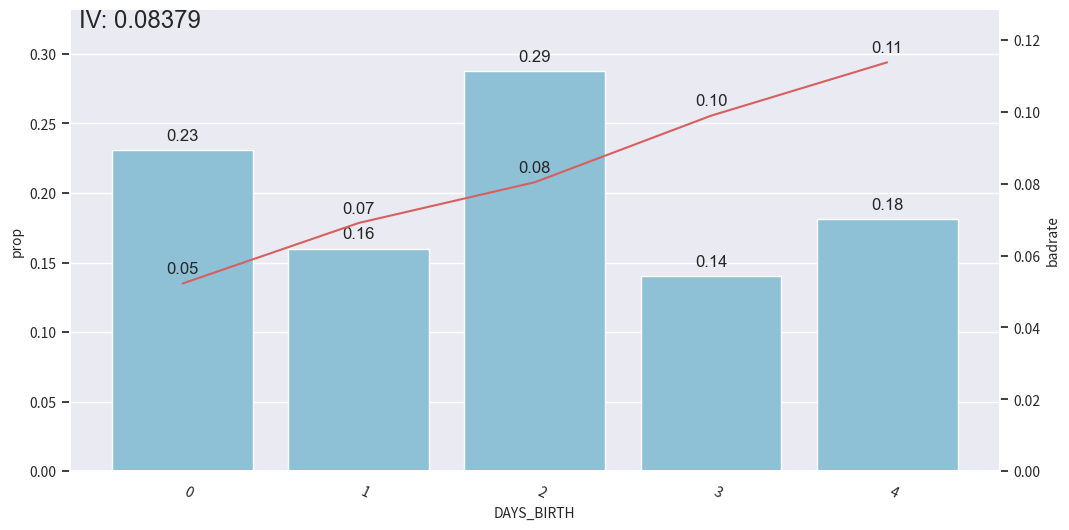

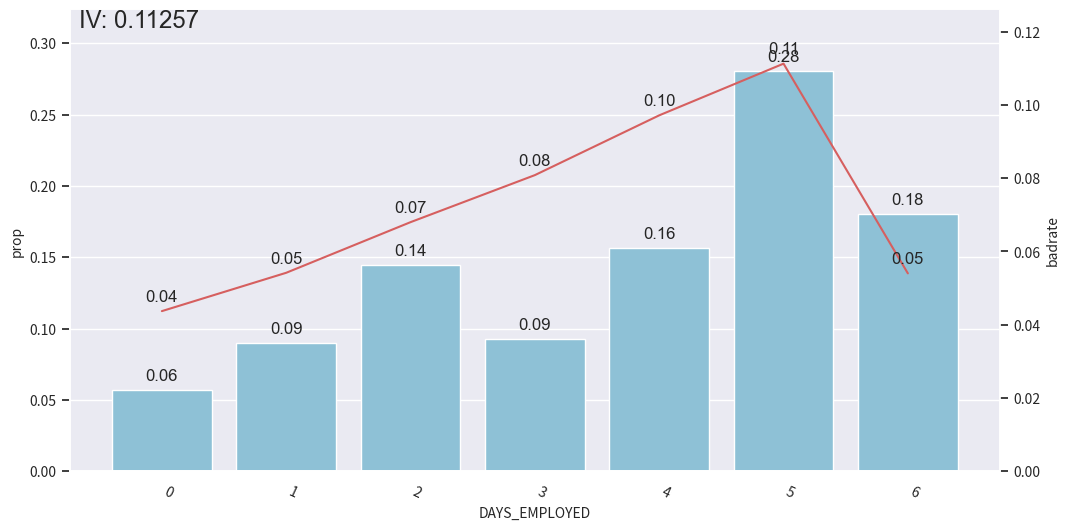

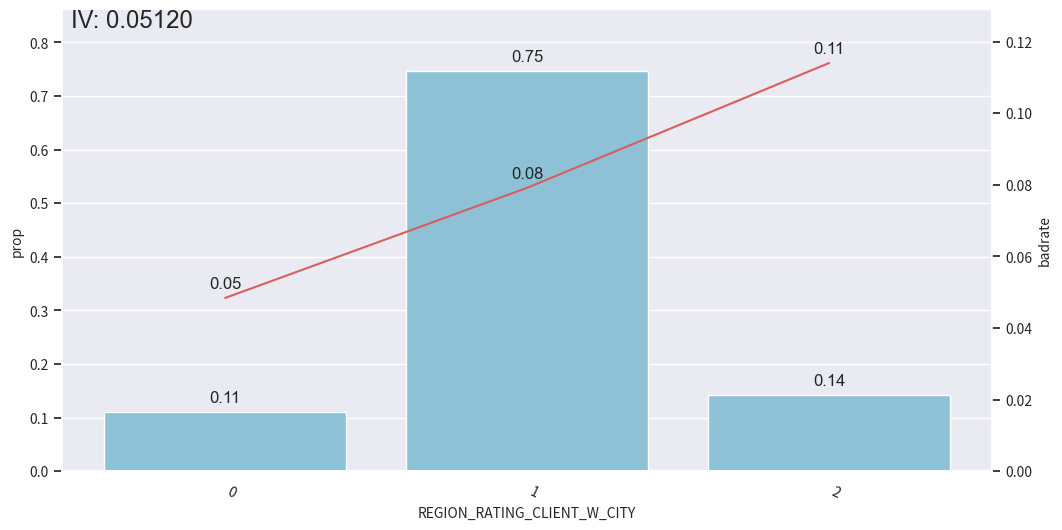

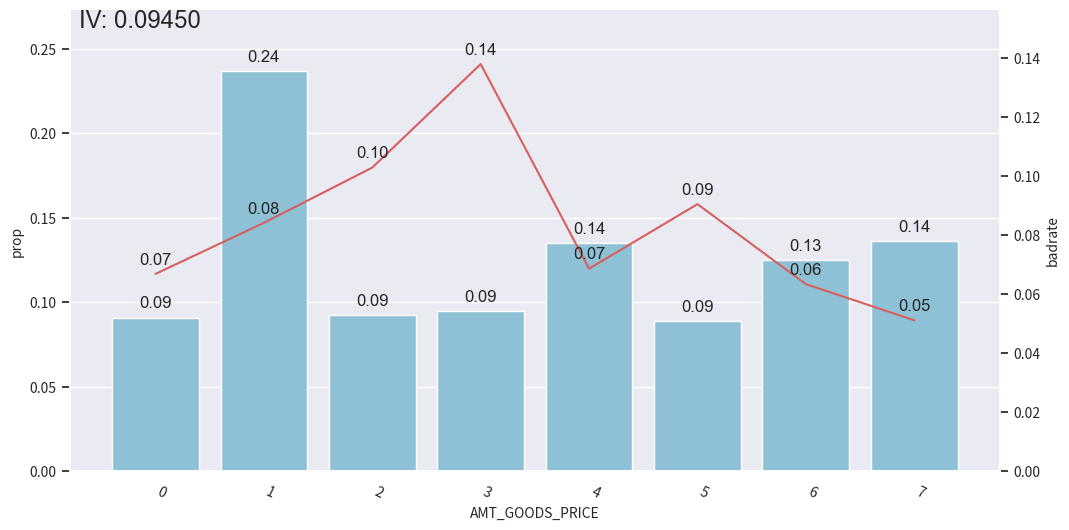

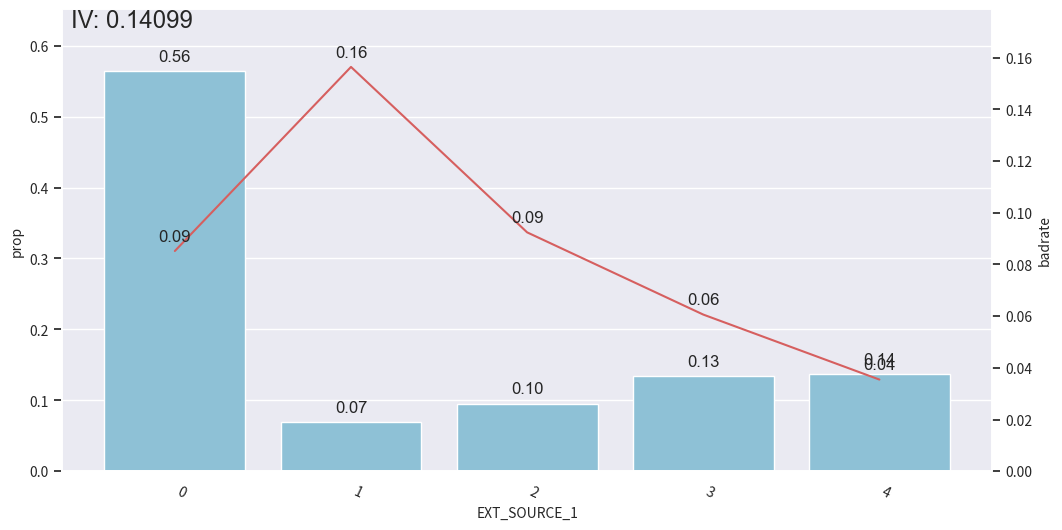

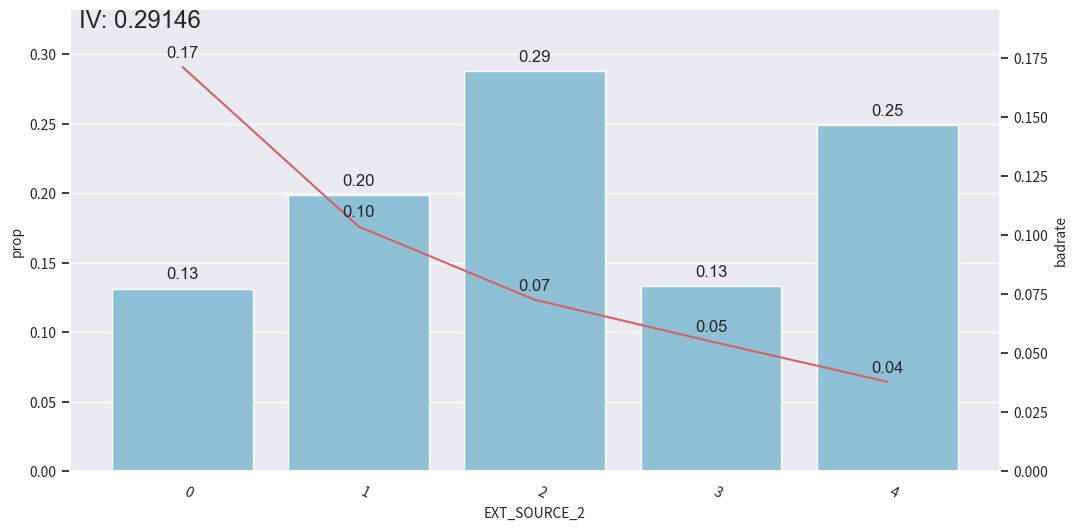

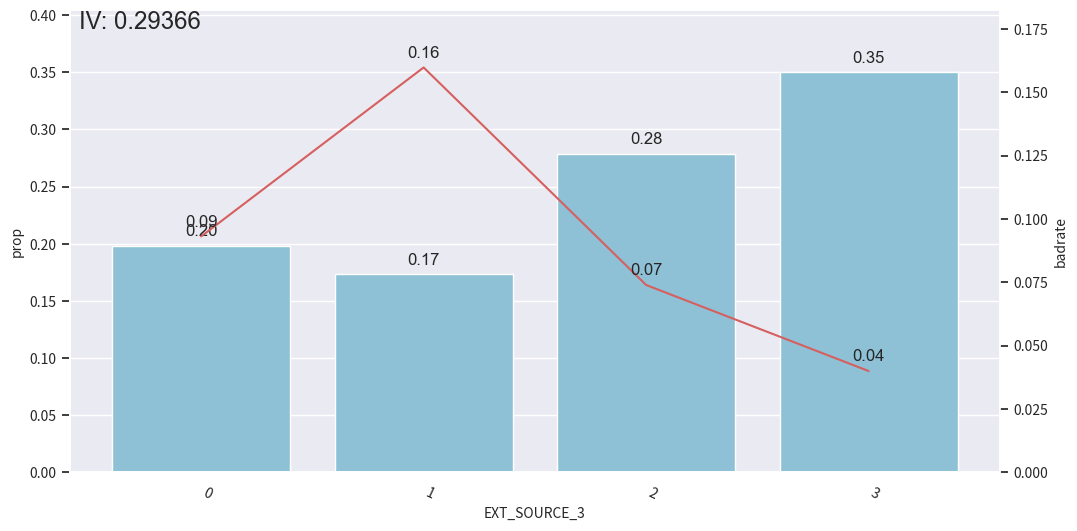

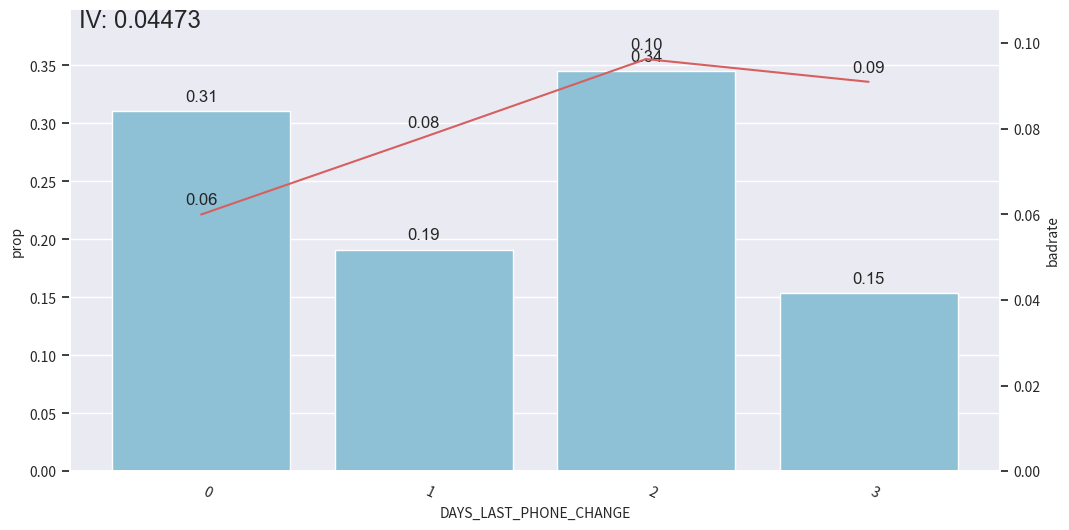

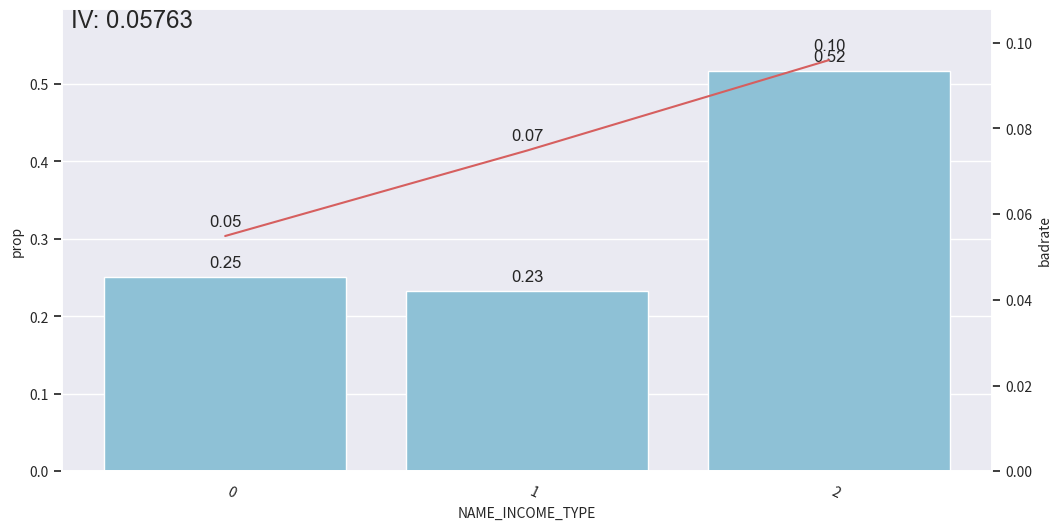

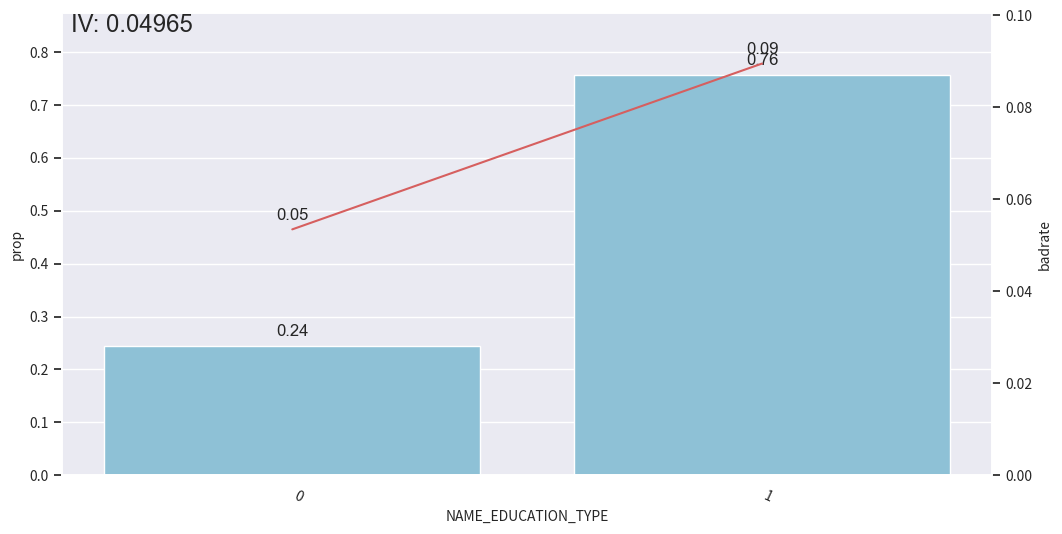

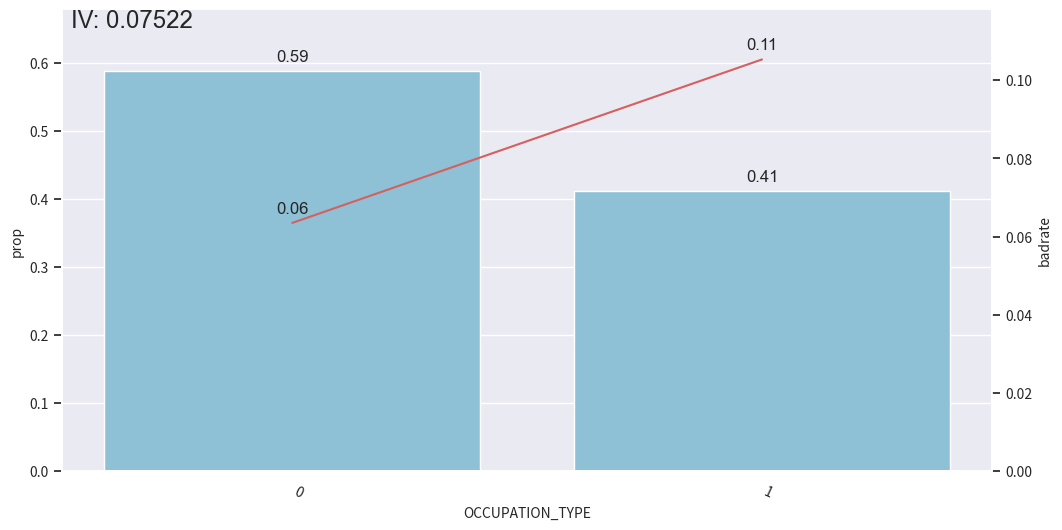

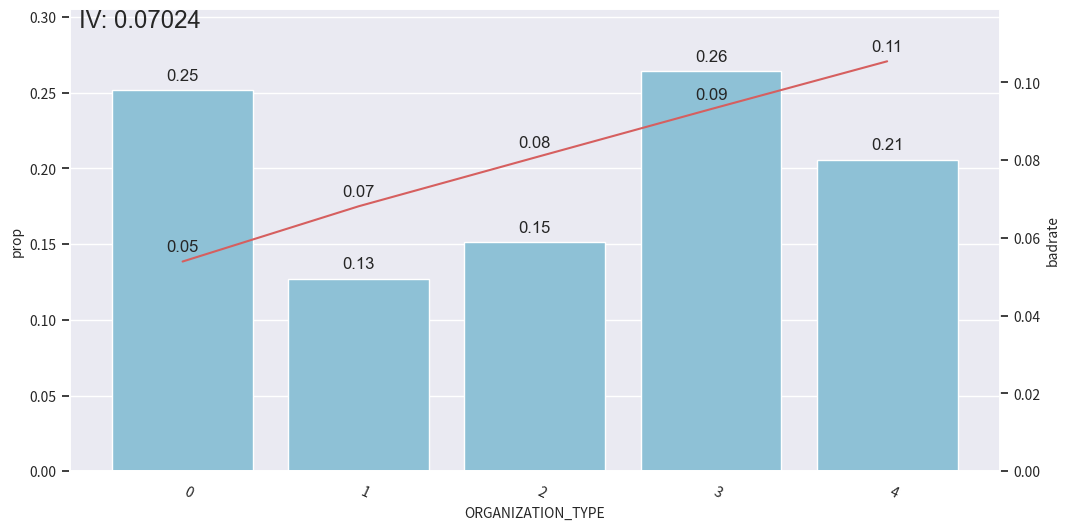

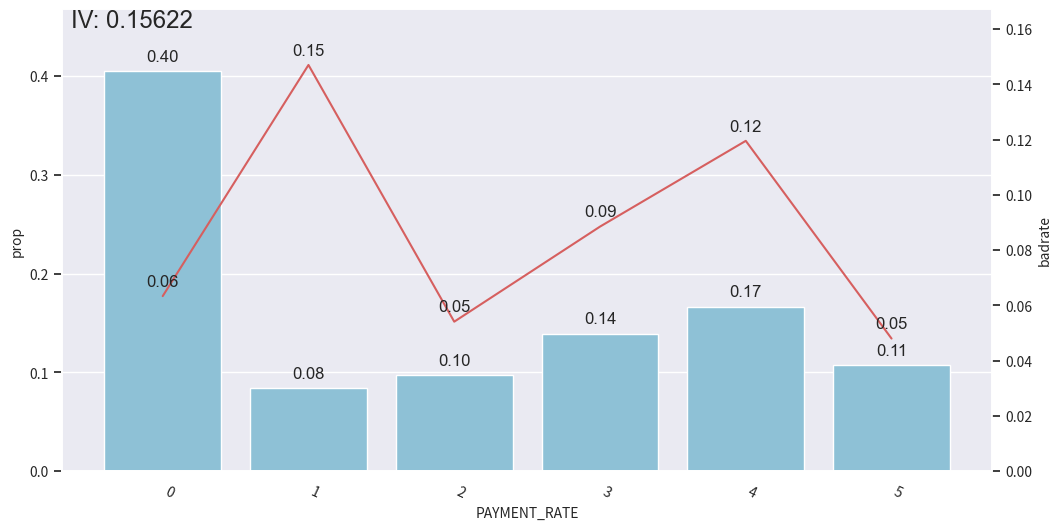

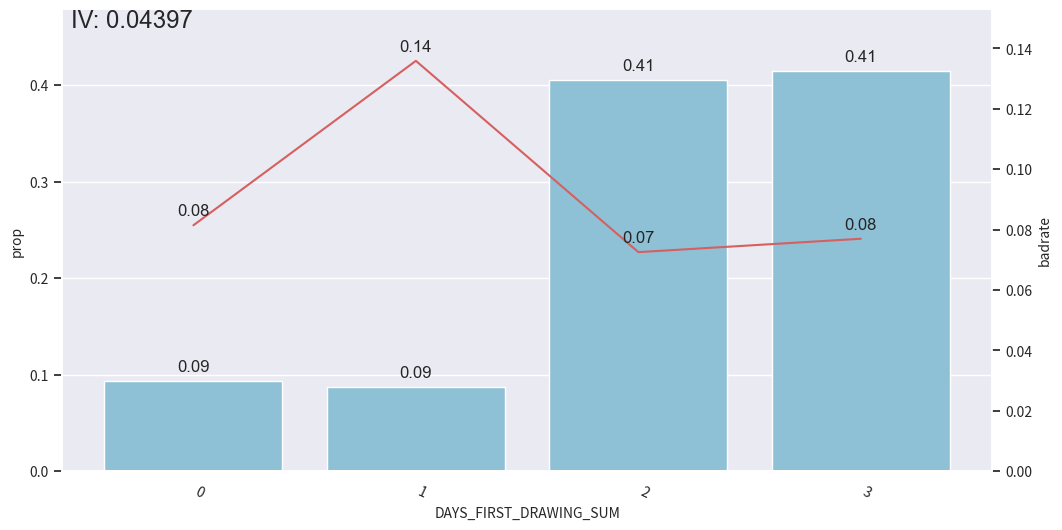

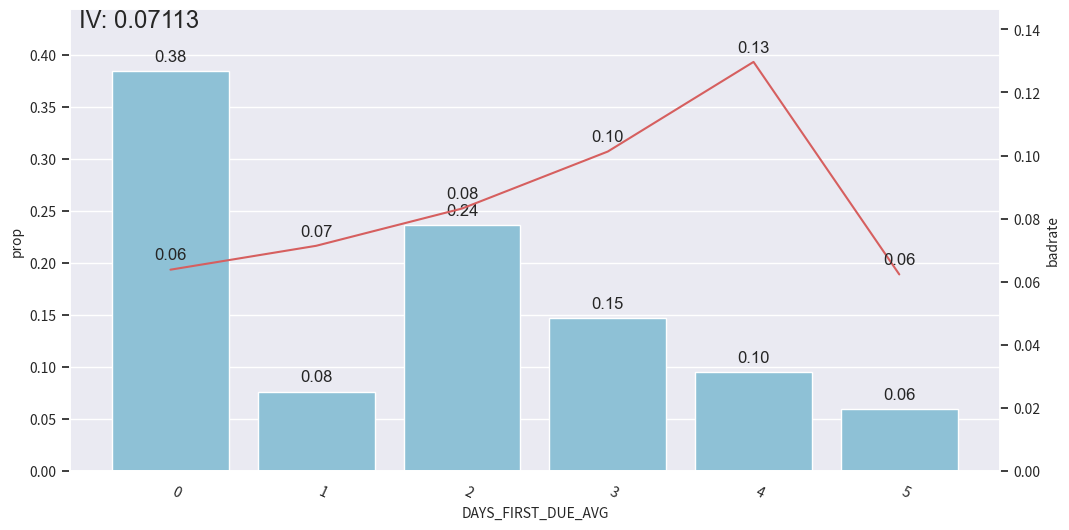

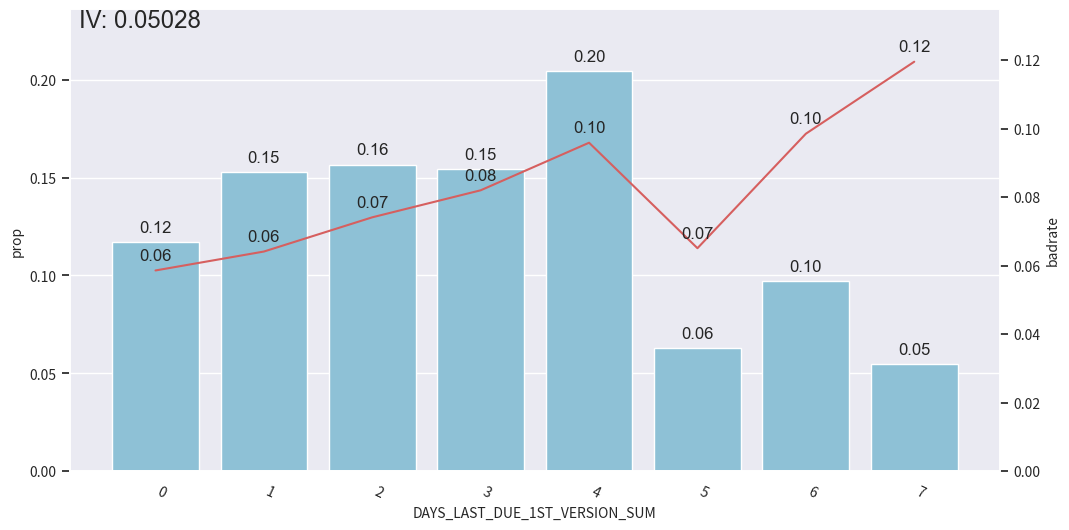

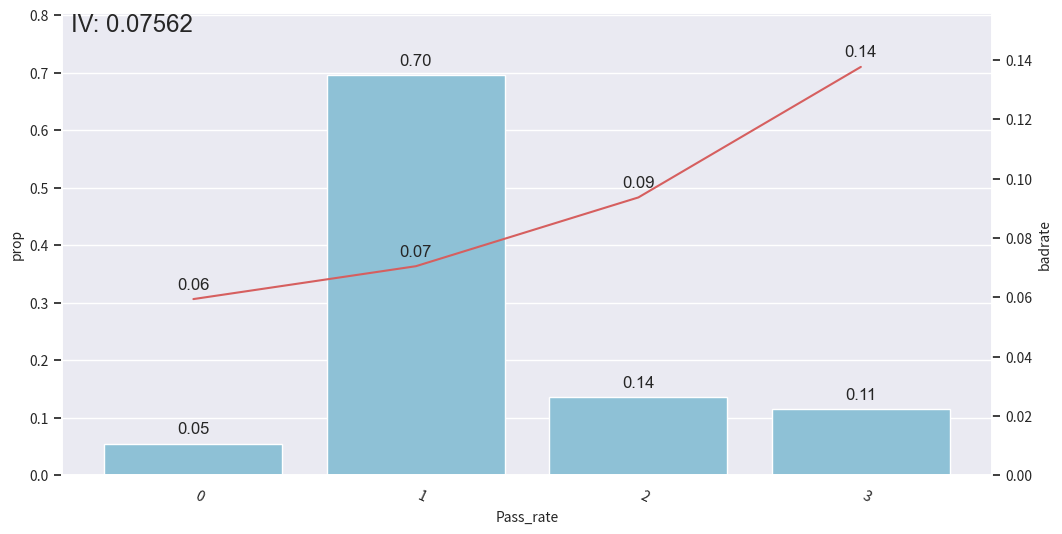

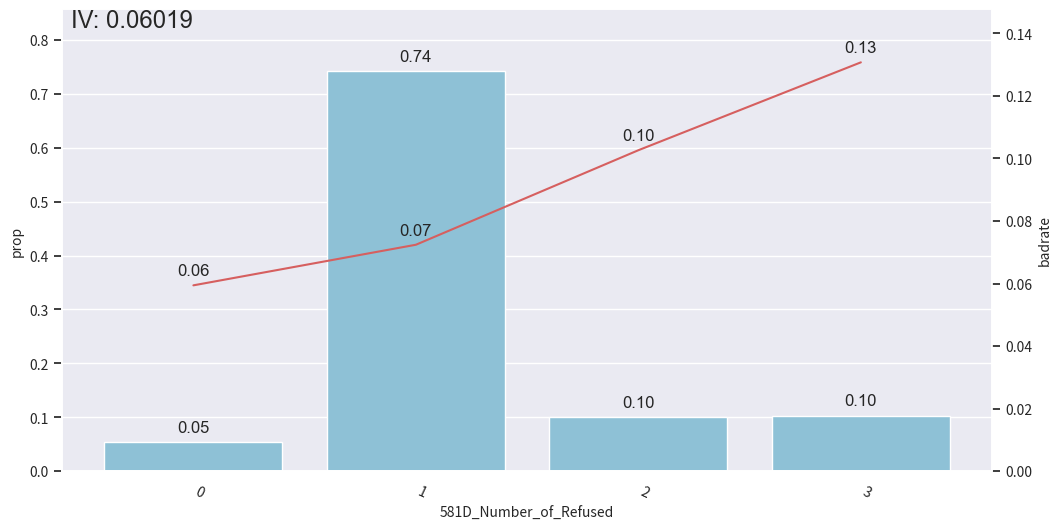

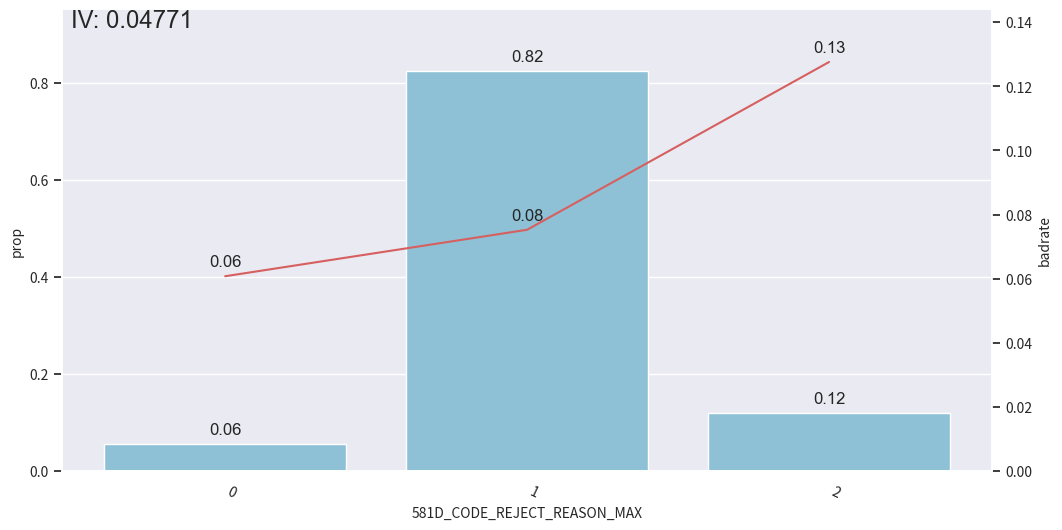

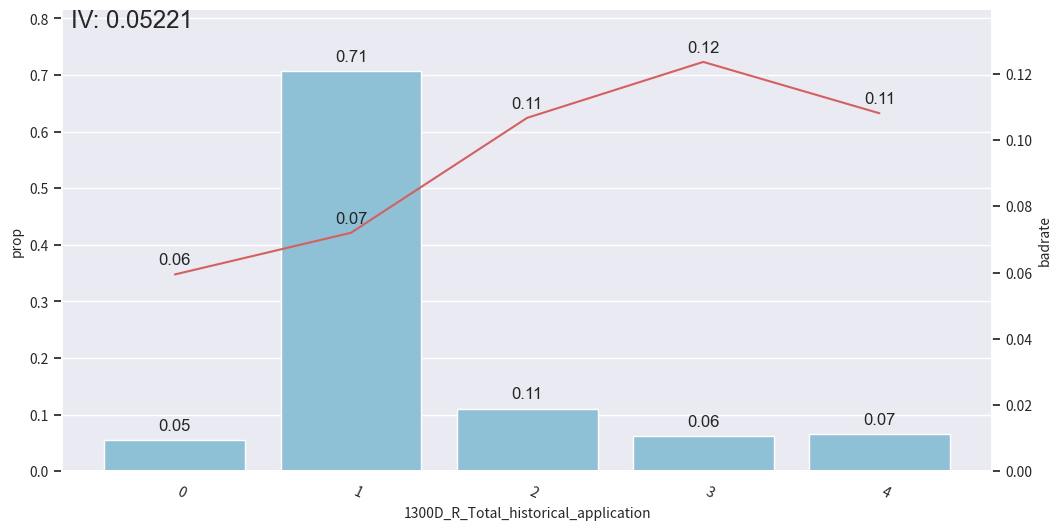

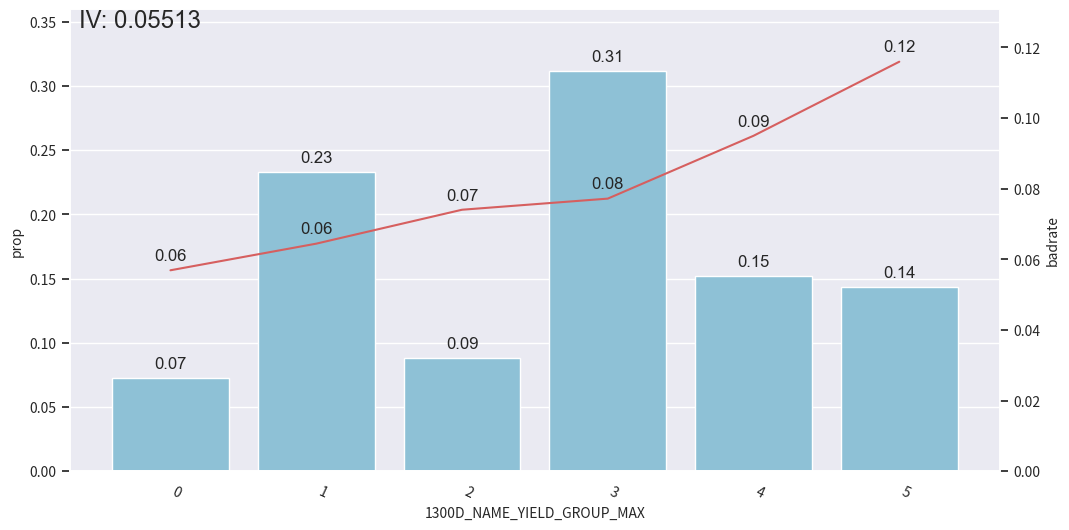

In [18]:
from toad.plot import bin_plot,badrate_plot
for i in lst:
    bin_plot(x_train_stp2, x=i, target='TARGET')

In [36]:
adj_bin = {'DAYS_BIRTH': [-19969, -17365, -13426, -11448],'DAYS_EMPLOYED': [-6350.0, -3940.0, -2427.0, -1789.0],'REGION_RATING_CLIENT_W_CITY': [2, 3],
'AMT_GOODS_PRICE': [450234.0,
  675382.5,
  900090.0],
'EXT_SOURCE_1': [0.26420048, 0.42328972, 0.63124865],'EXT_SOURCE_2': [0.25929493, 0.46354237, 0.6150905, 0.66375864],
'EXT_SOURCE_3': [0.344155, 0.5726825],
'DAYS_LAST_PHONE_CHANGE': [-1384.0, -753.0],
'NAME_INCOME_TYPE': [['Student', 'Pensioner', 'State servant'],
  ['Commercial associate', 'Businessman'],
  ['Working', 'Unemployed', 'Maternity leave']],
 'NAME_EDUCATION_TYPE': [['Academic degree', 'Higher education'],
  ['Incomplete higher', 'Secondary / secondary special', 'Lower secondary']],     'OCCUPATION_TYPE': [['Accountants',
   'High skill tech staff',
   'Managers',
   'Core staff',
   'HR staff',
   'IT staff',
   '-1',
   'Private service staff',
   'Medicine staff',
   'Secretaries',
   'Realty agents'],
  ['Cleaning staff',
   'Sales staff',
   'Cooking staff',
   'Laborers',
   'Security staff',
   'Waiters/barmen staff',
   'Drivers',
   'Low-skill Laborers']], 'ORGANIZATION_TYPE': [['Trade: type 4',
   'Industry: type 12',
   'Transport: type 1',
   'Trade: type 6',
   'Security Ministries',
   'University',
   'Police',
   'Military',
   'Bank',
   '-1',
   'Culture',
   'Insurance',
   'Religion',
   'School'],
  ['Trade: type 5',
   'Hotel',
   'Industry: type 10',
   'Medicine',
   'Services',
   'Electricity',
   'Industry: type 9',
   'Industry: type 5',
   'Government',
   'Trade: type 2',
   'Kindergarten',
   'Industry: type 6',
   'Emergency',
   'Industry: type 2'],
  ['Telecom',
   'Other',
   'Transport: type 2',
   'Legal Services',
   'Housing',
   'Industry: type 7',
   'Business Entity Type 1',
   'Advertising',
   'Postal',
   'Business Entity Type 2',
   'Industry: type 11',
   'Trade: type 1',
   'Mobile'],
  ['Transport: type 4', 'Business Entity Type 3', 'Trade: type 7'],
  ['Security',
   'Industry: type 4',
   'Self-employed',
   'Trade: type 3',
   'Agriculture',
   'Realtor',
   'Industry: type 3',
   'Industry: type 1',
   'Cleaning',
   'Construction',
   'Restaurant',
   'Industry: type 8',
   'Industry: type 13',
   'Transport: type 3']],
'PAYMENT_RATE': [0.0497382198952879],
'DAYS_FIRST_DRAWING_SUM': [-14.0, -2.0],
'DAYS_FIRST_DUE_AVG': [-862.3157894736842, -739.8, -410.2, -225.9],
 'DAYS_LAST_DUE_1ST_VERSION_SUM': [-4292.0,
  -2400.0,
  -1420.0,
  -589.0,353.0],'Pass_rate': [0.0, 1.3333333333333333, 1.8666666666666667],'581D_Number_of_Refused': [0.0, 1.0, 2.0],
 '581D_CODE_REJECT_REASON_MAX': [['-1'],
  ['0', 'XAP', 'VERIF'],
  ['HC', 'SCO', 'LIMIT', 'SCOFR', 'SYSTEM']],
'1300D_R_Total_historical_application': [0.0, 4500.0, 396450.0],'1300D_NAME_YIELD_GROUP_MAX': [['low_action'],
  ['low_normal'],
  ['0'],
  ['middle'],
  ['-1'],
  ['high']]}

C:\Users\melx99\AppData\Roaming\Python\Python311\site-packages\toad\plot.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


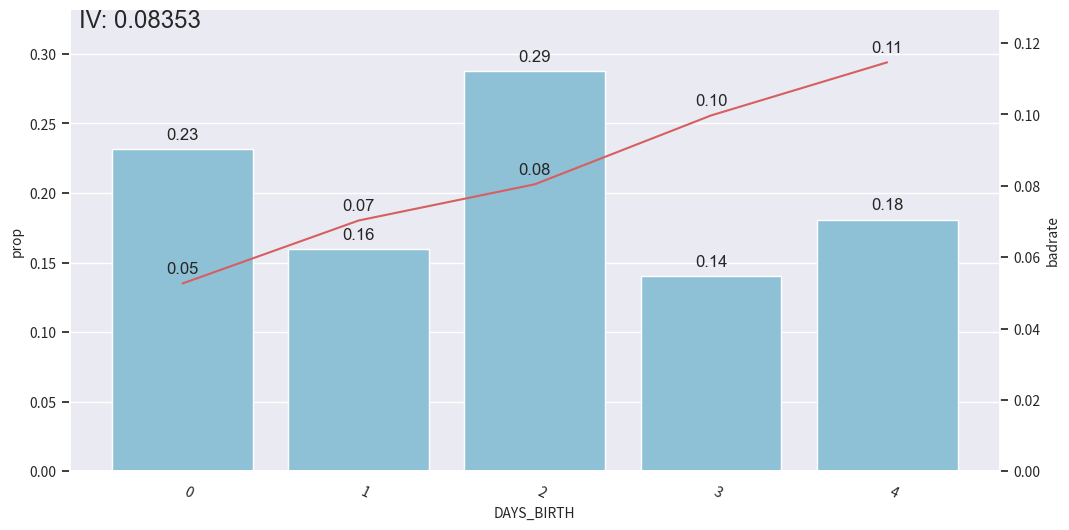

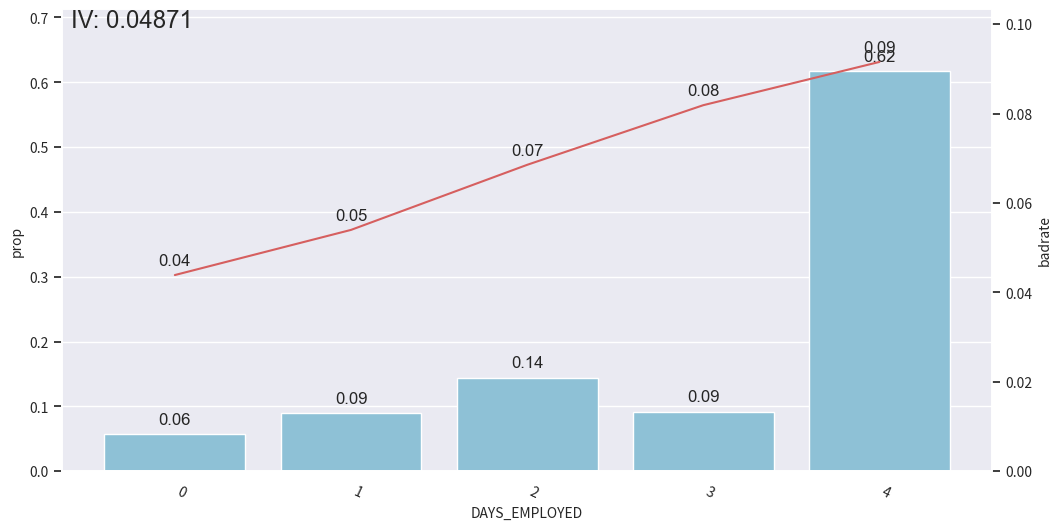

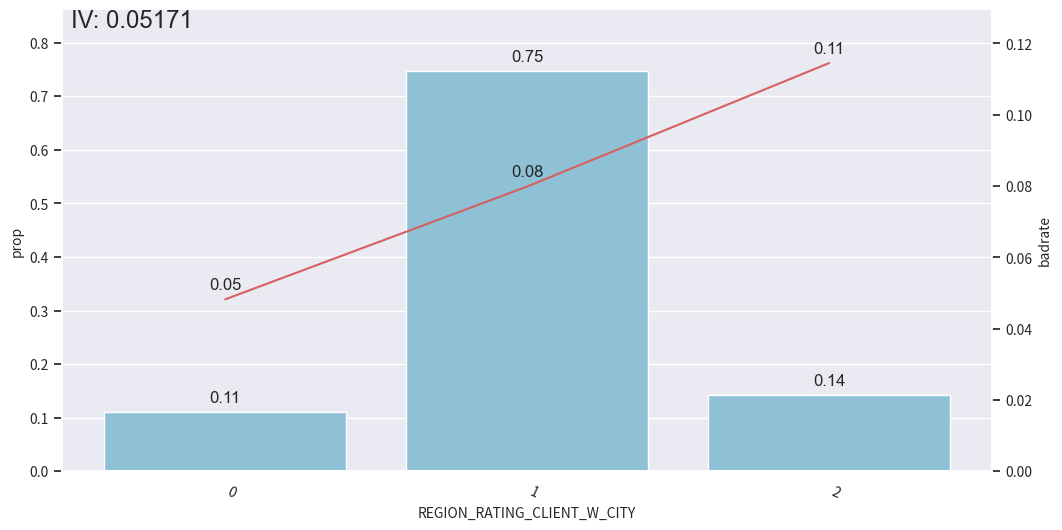

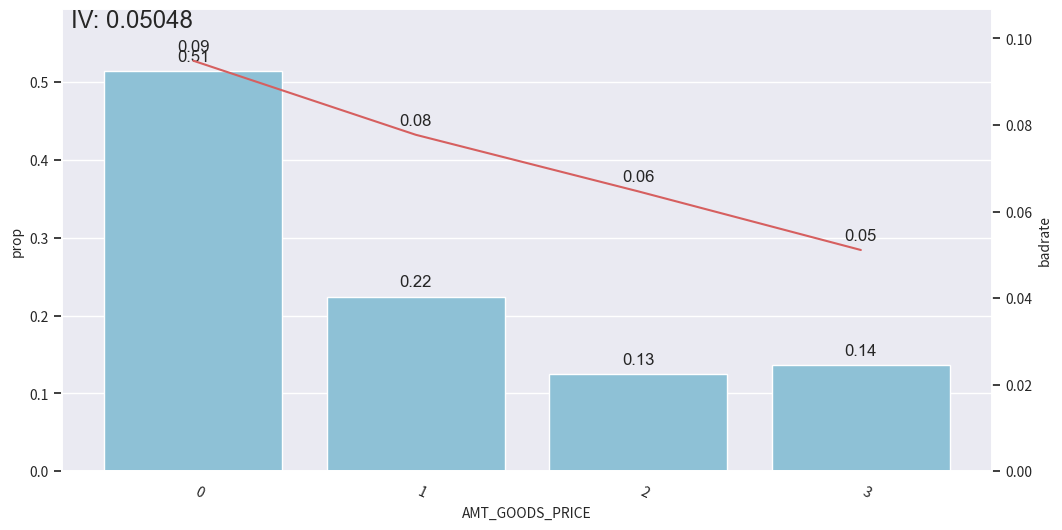

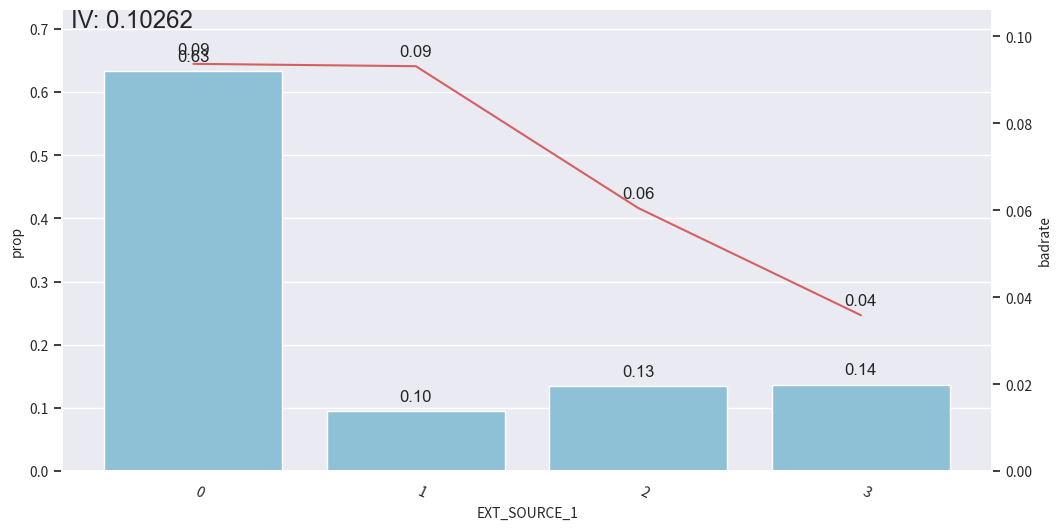

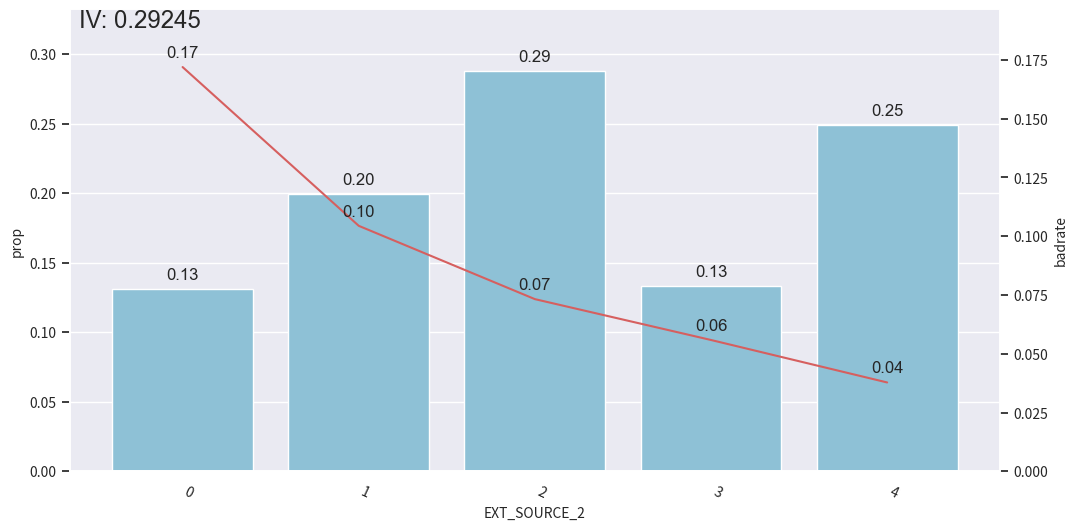

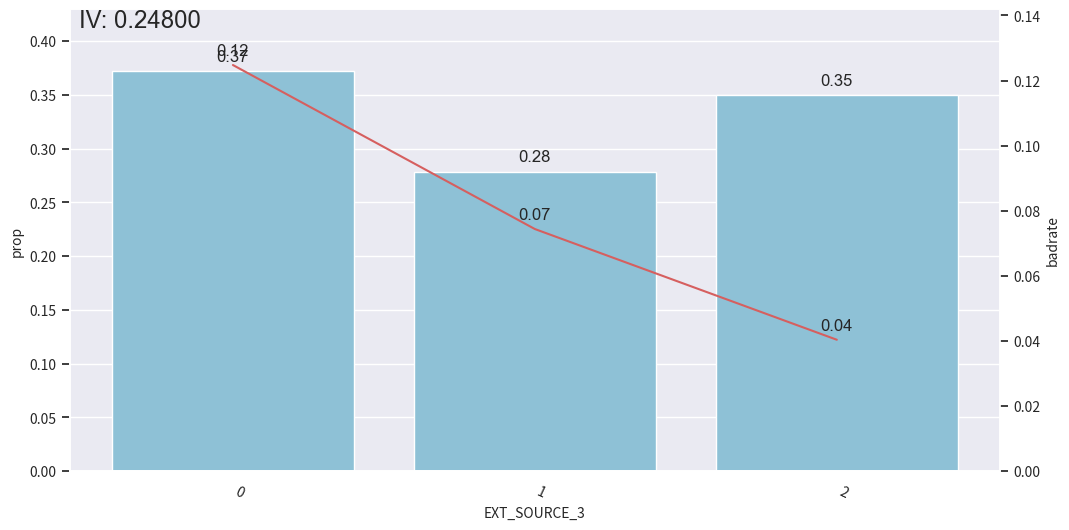

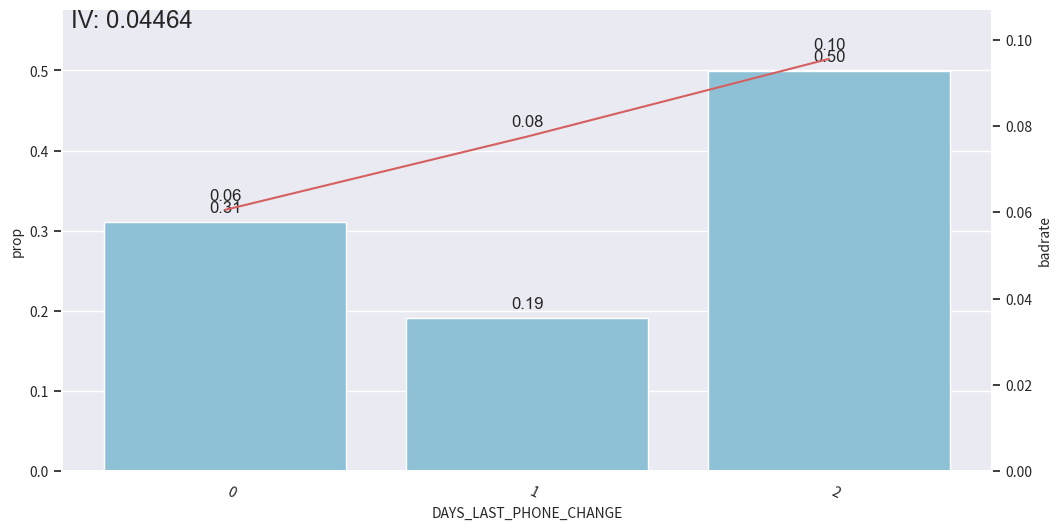

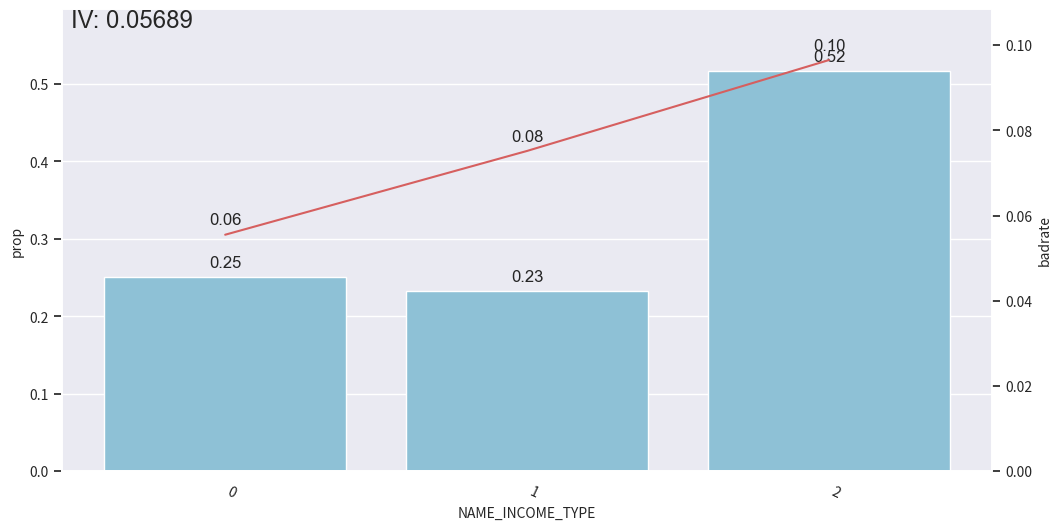

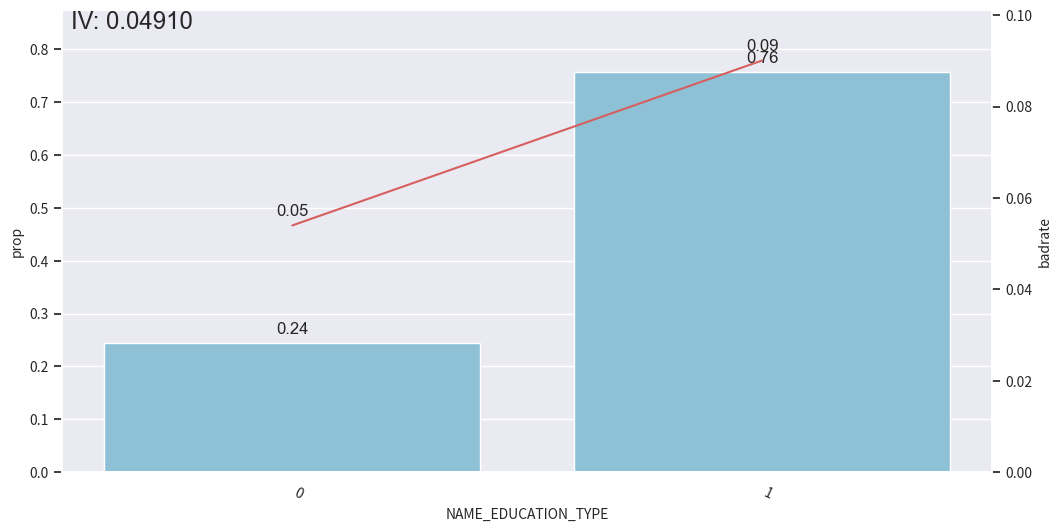

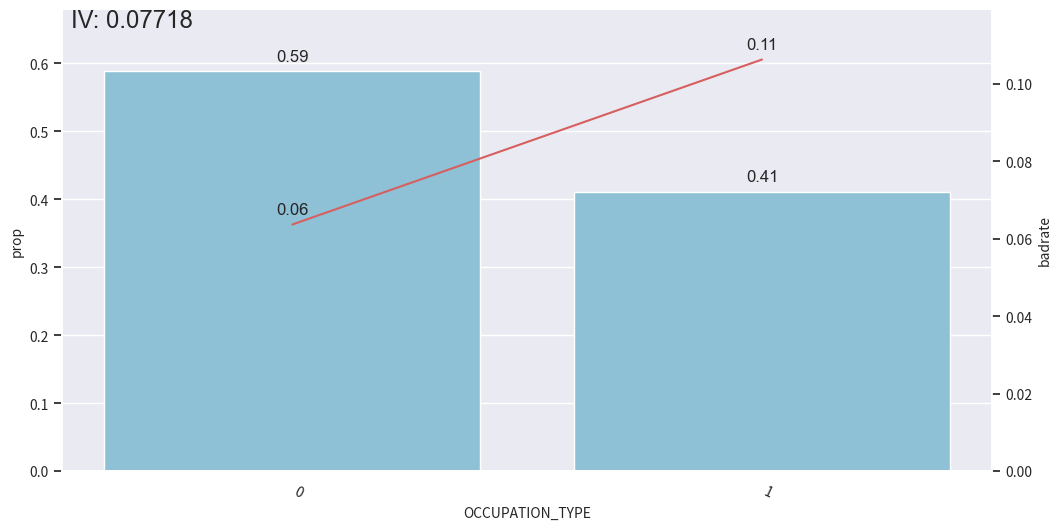

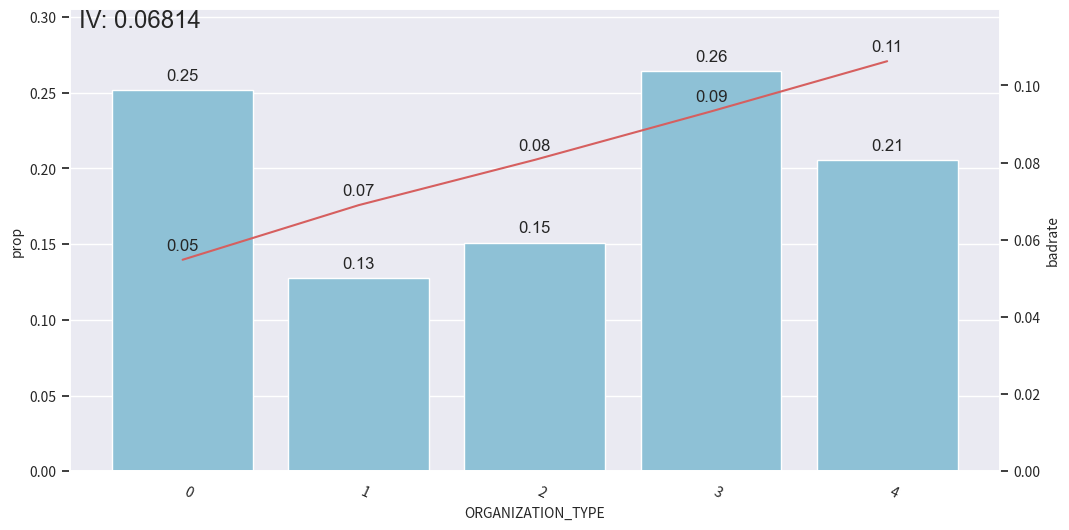

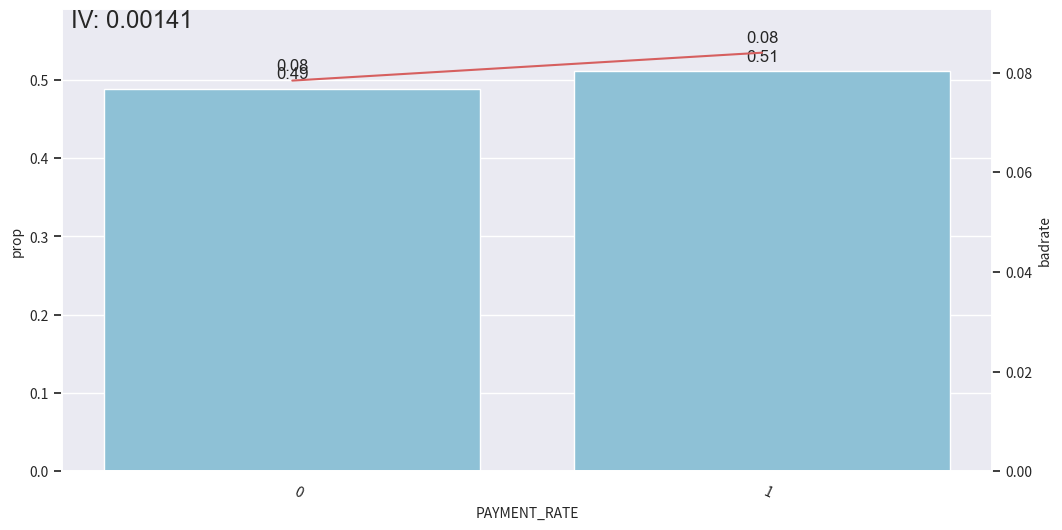

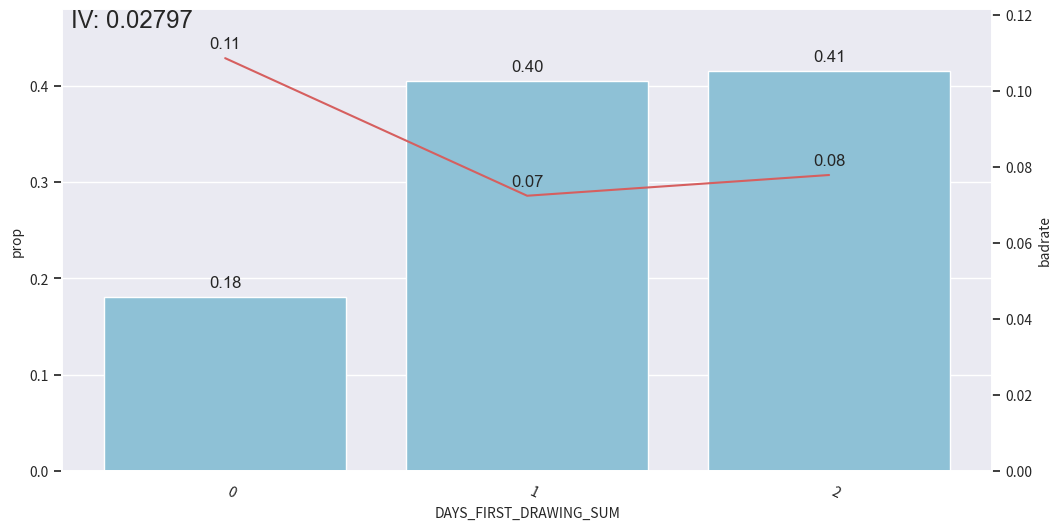

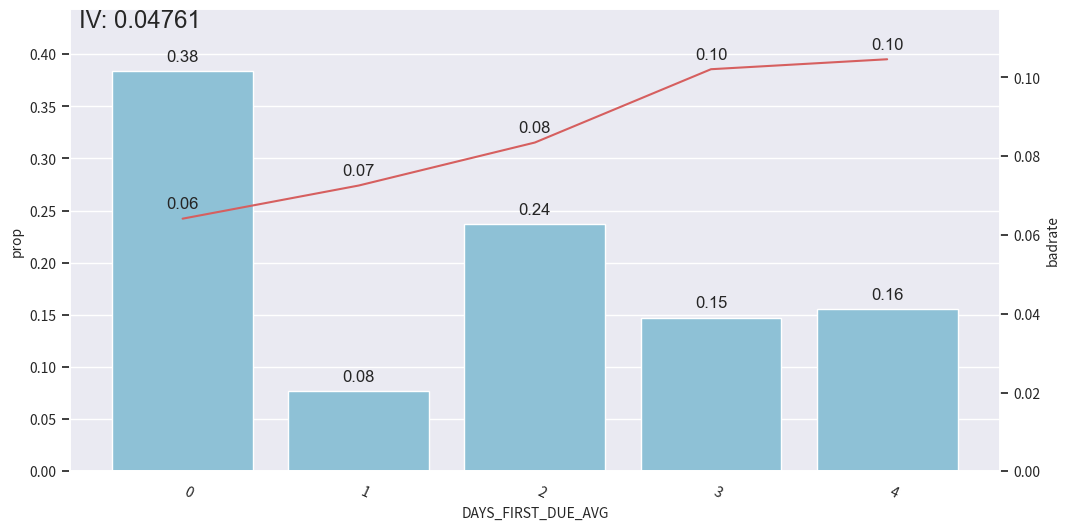

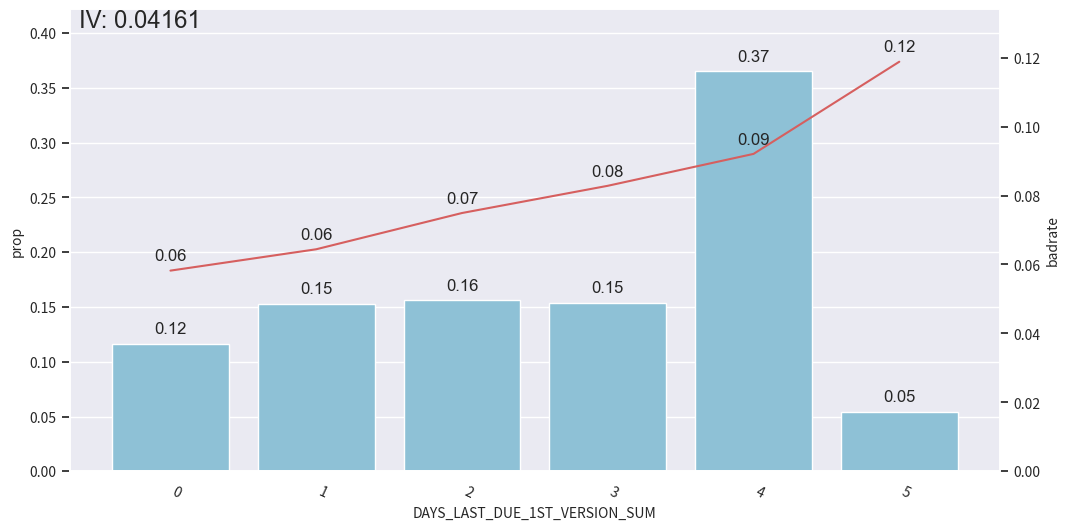

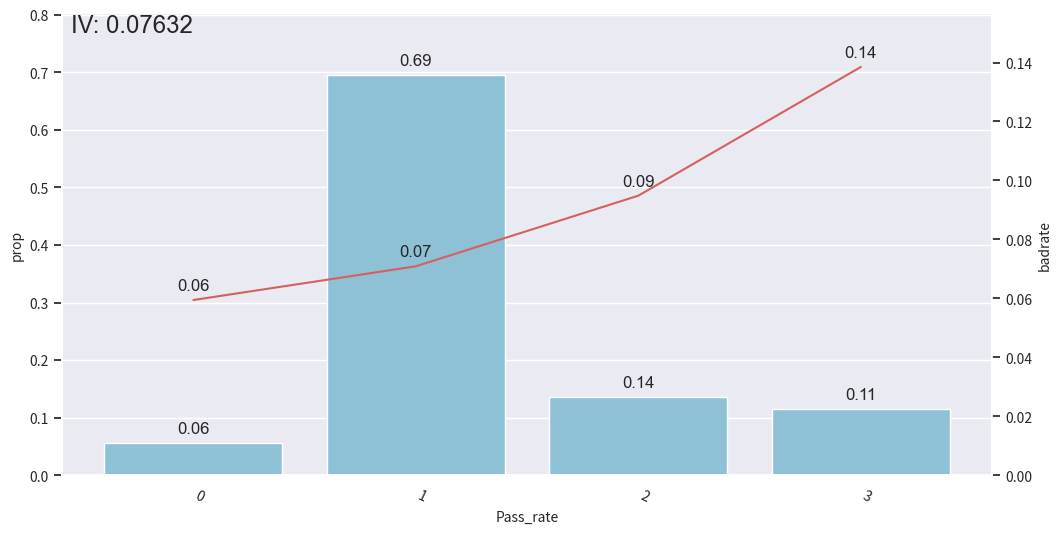

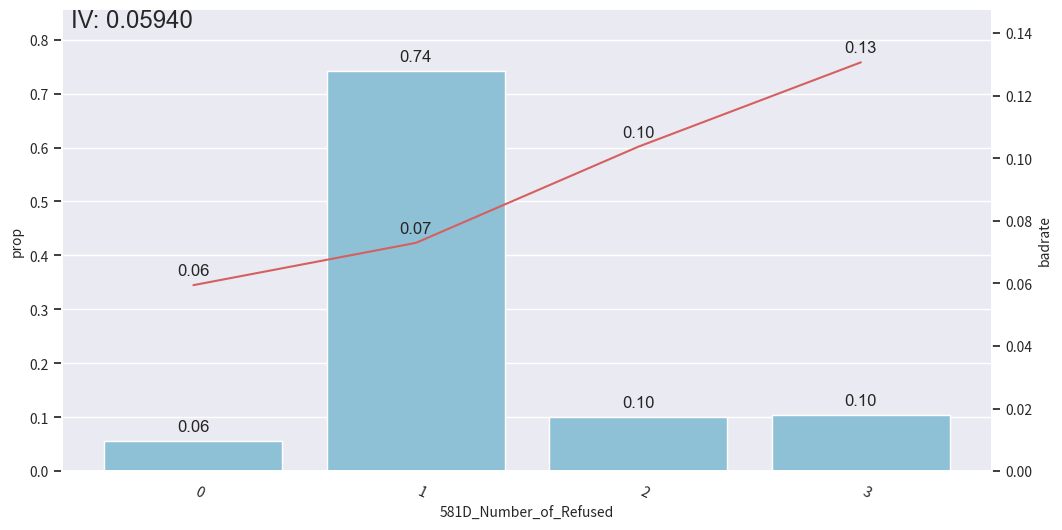

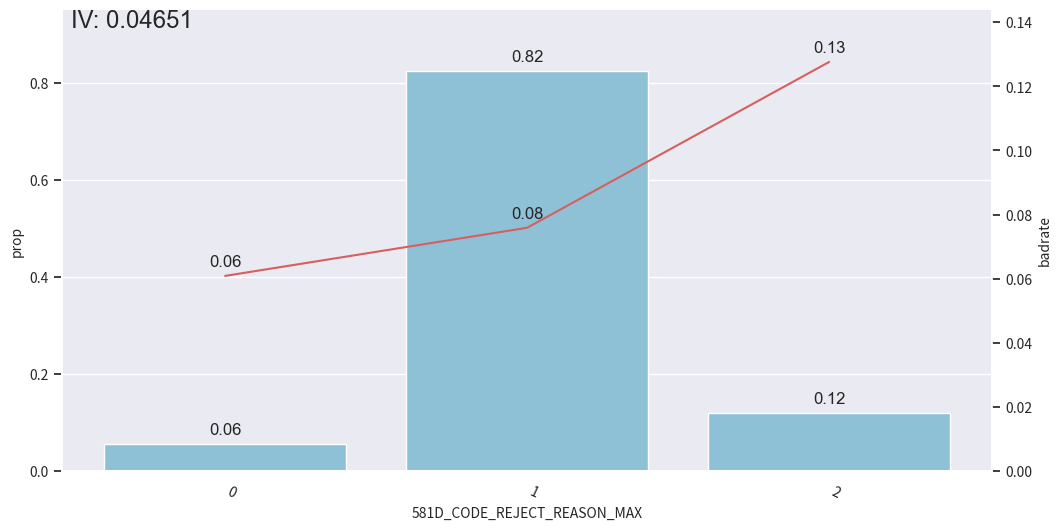

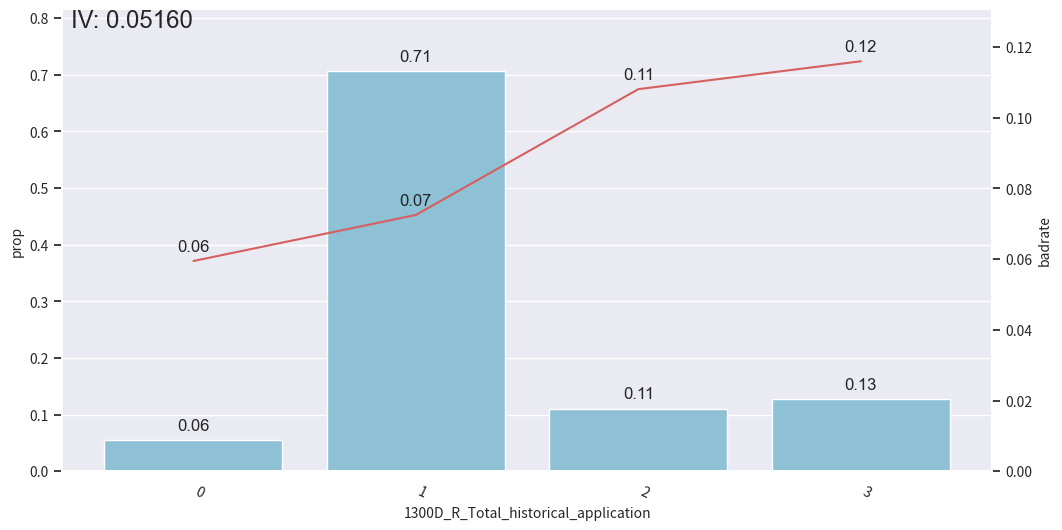

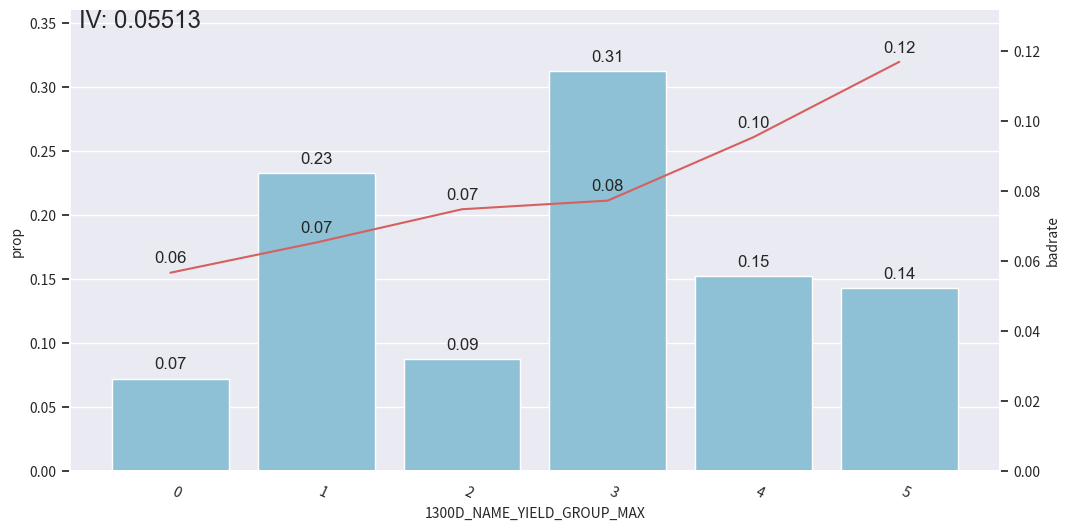

In [37]:
combiner.set_rules(adj_bin)
x_train_stp2 = combiner.transform(x_train_stp)
for i in lst:
    bin_plot(x_train_stp2, x=i, target=y_train)


C:\Users\melx99\AppData\Roaming\Python\Python311\site-packages\toad\plot.py:270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


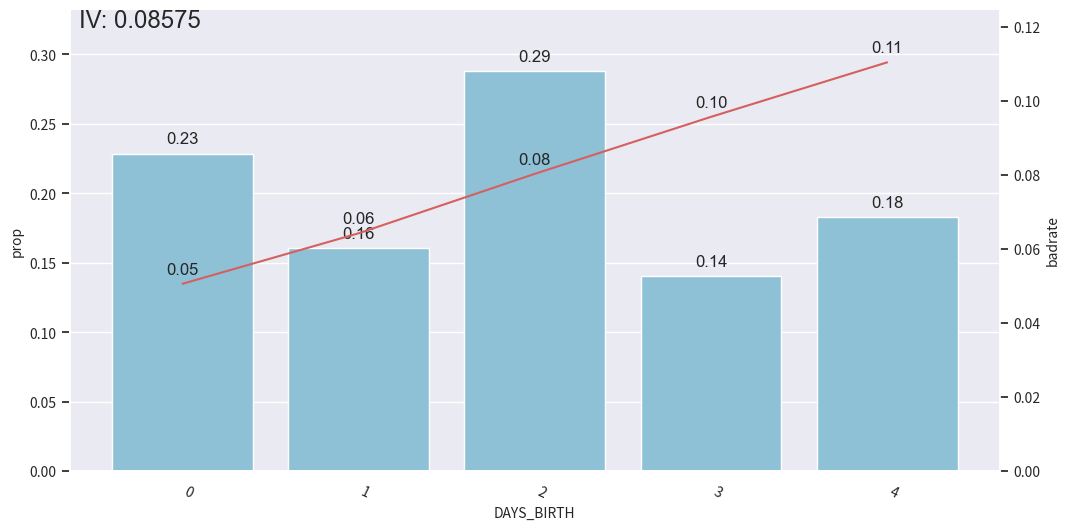

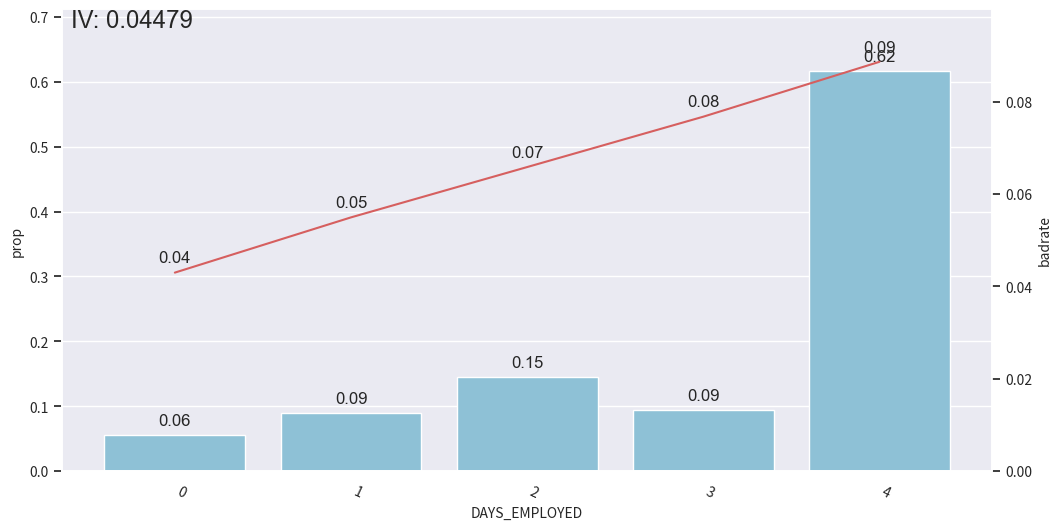

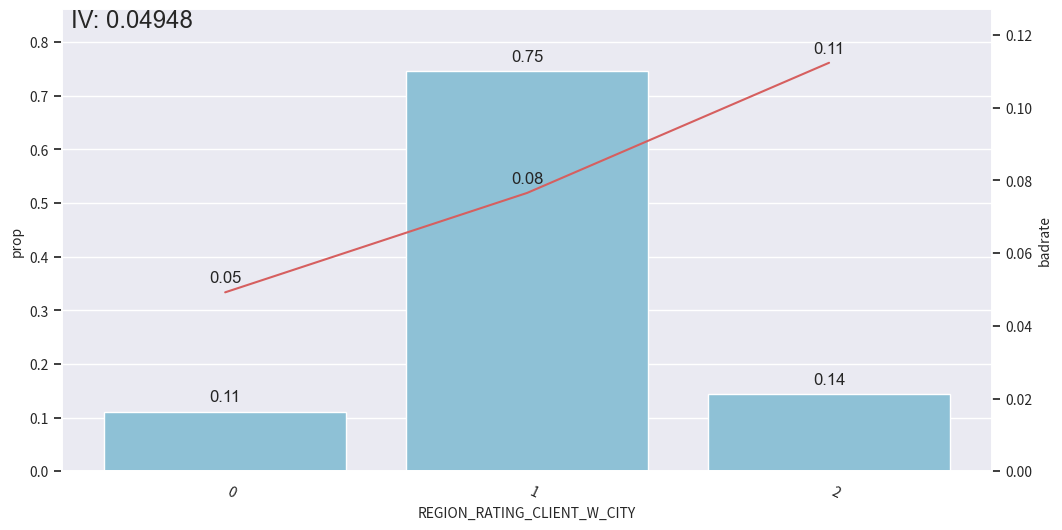

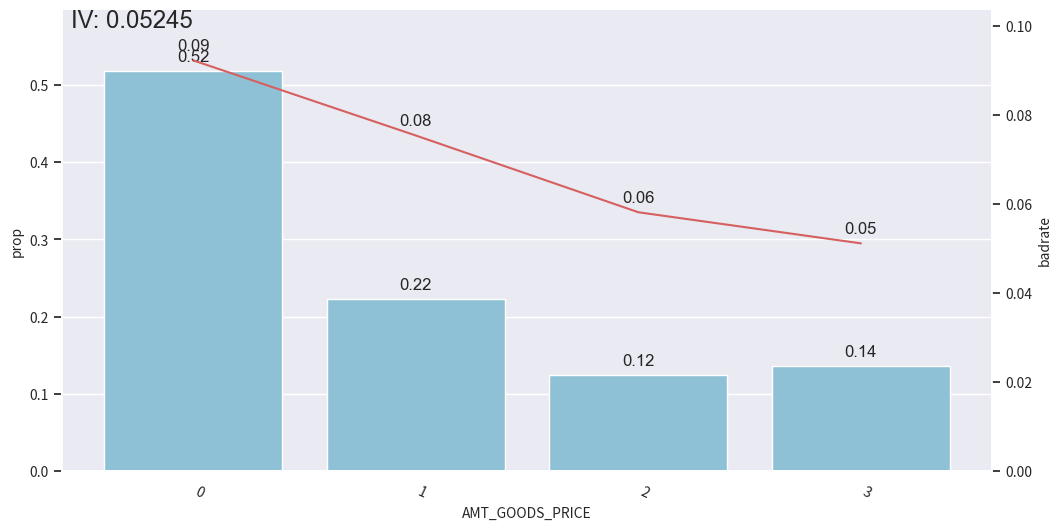

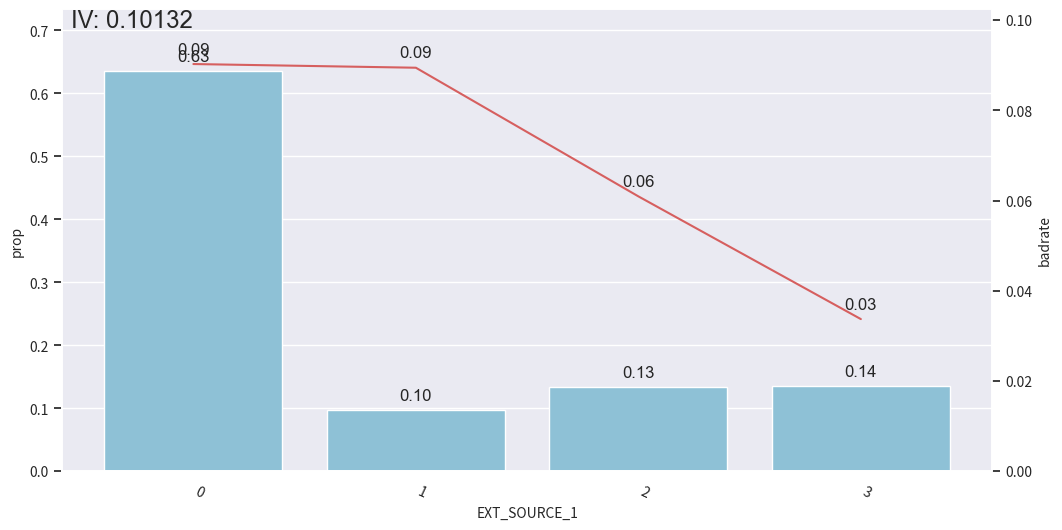

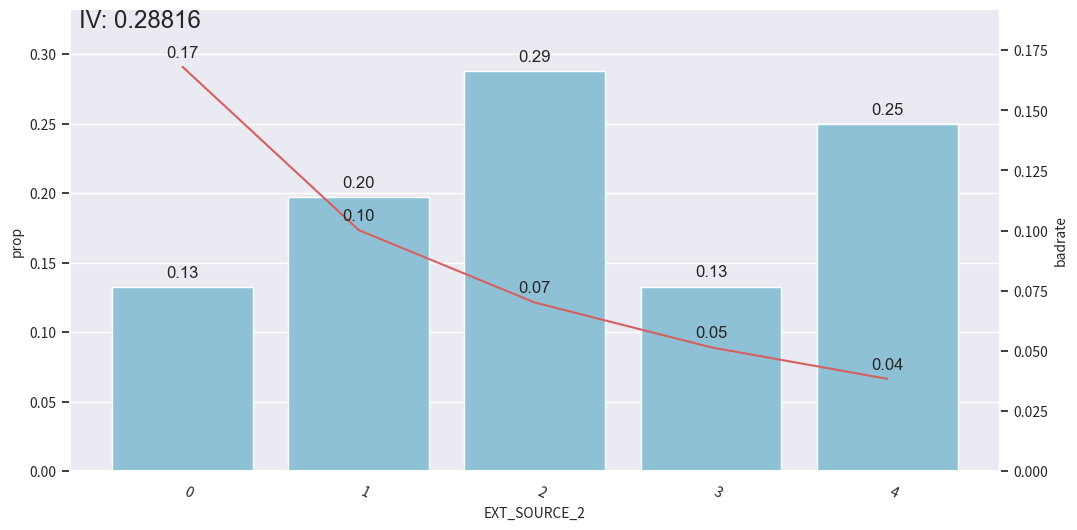

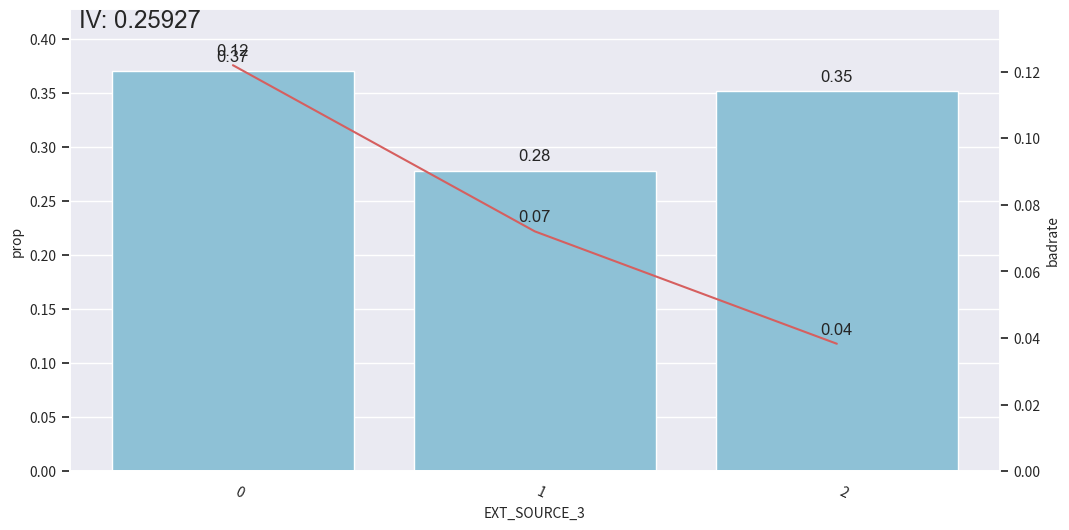

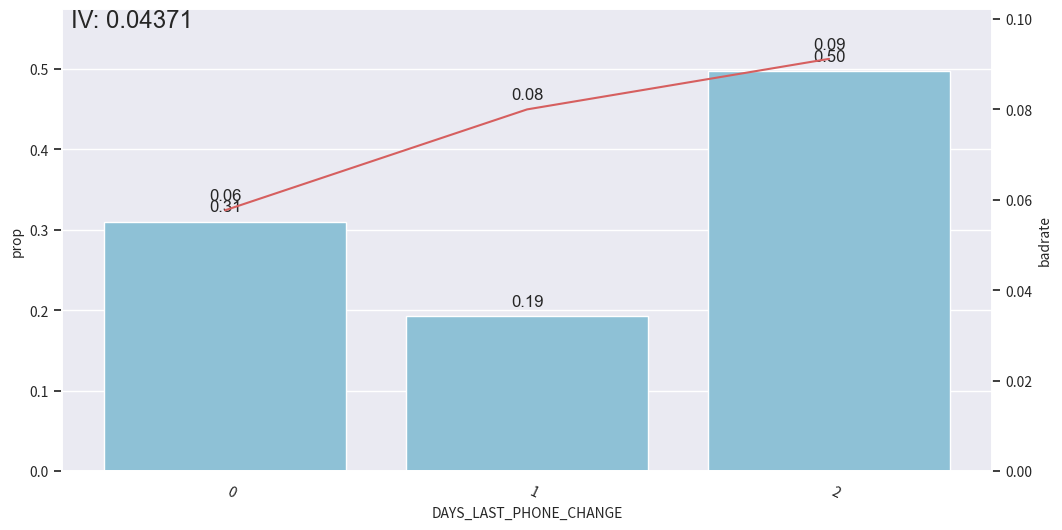

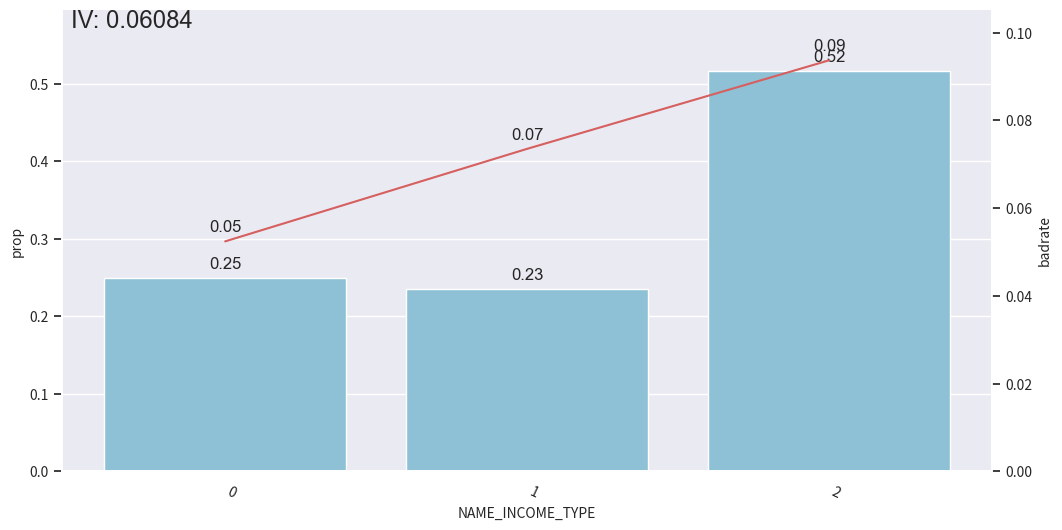

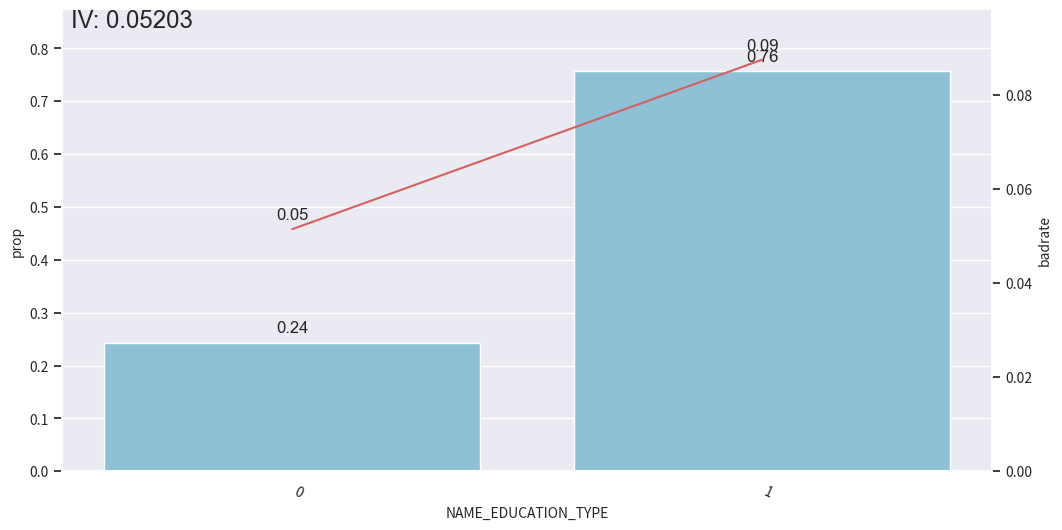

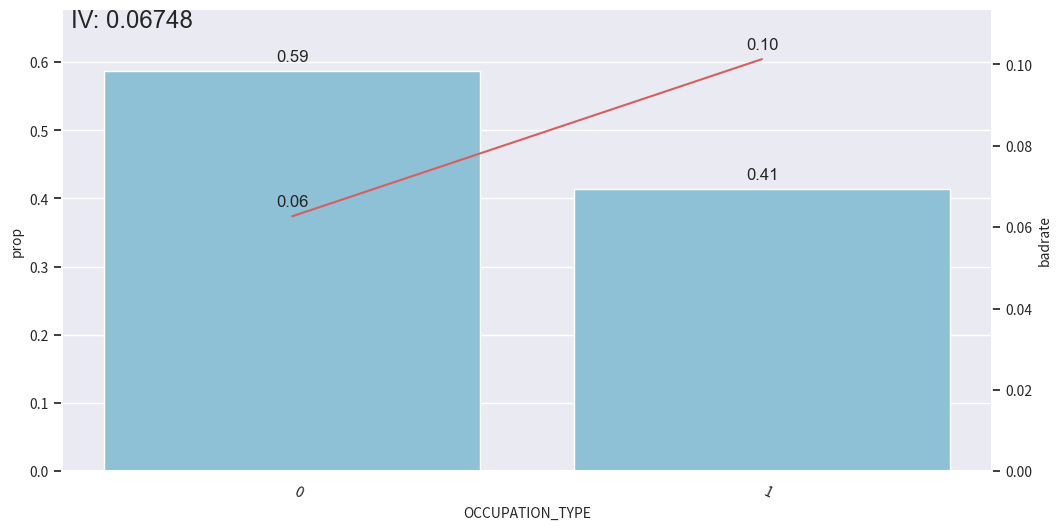

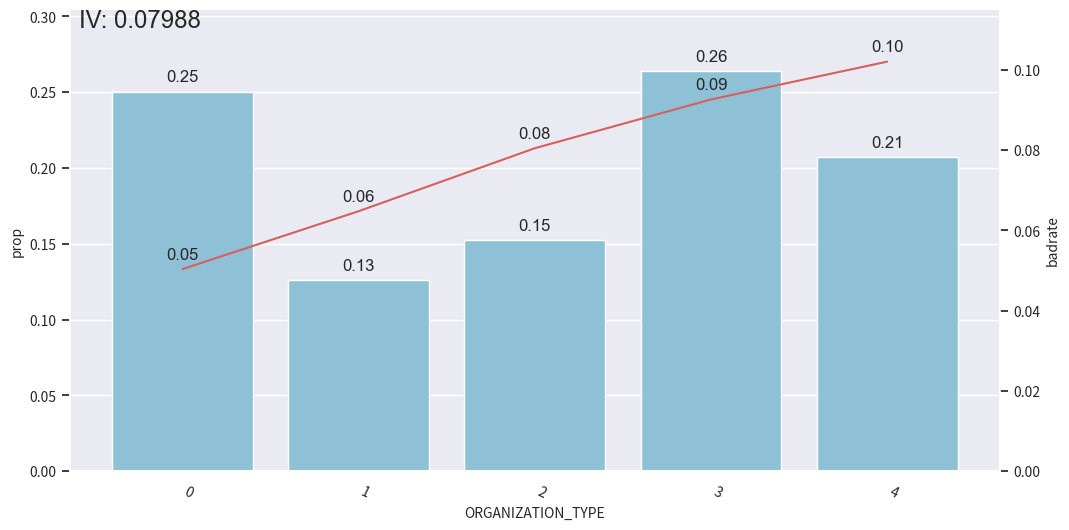

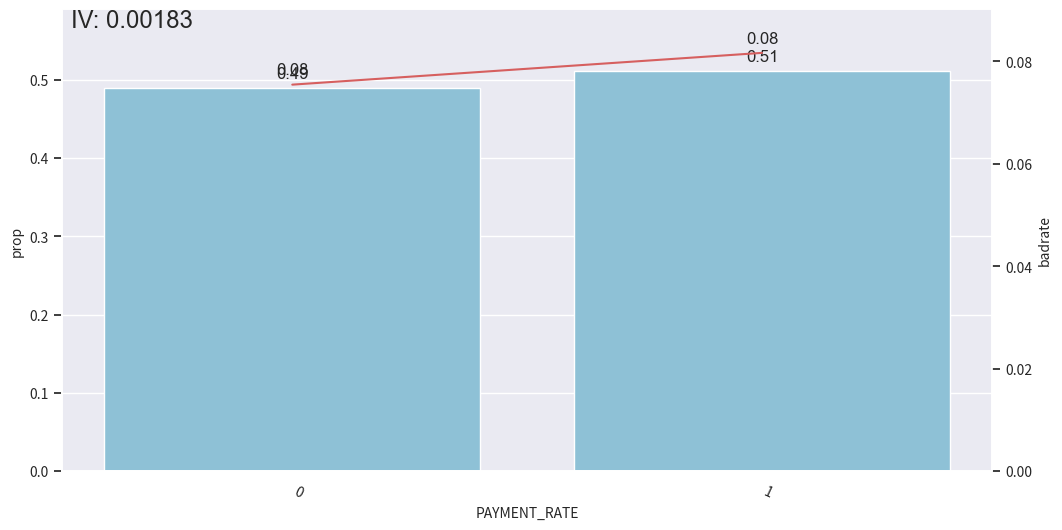

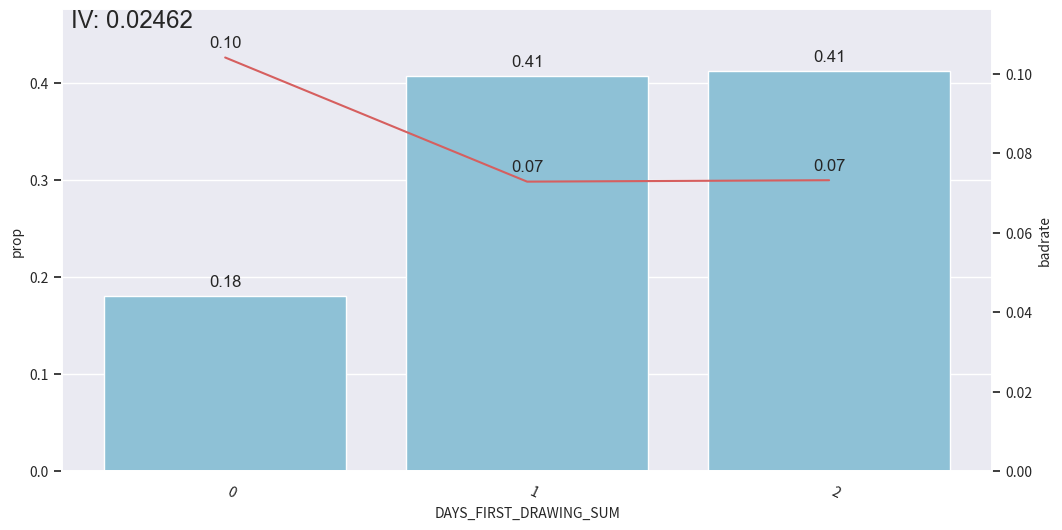

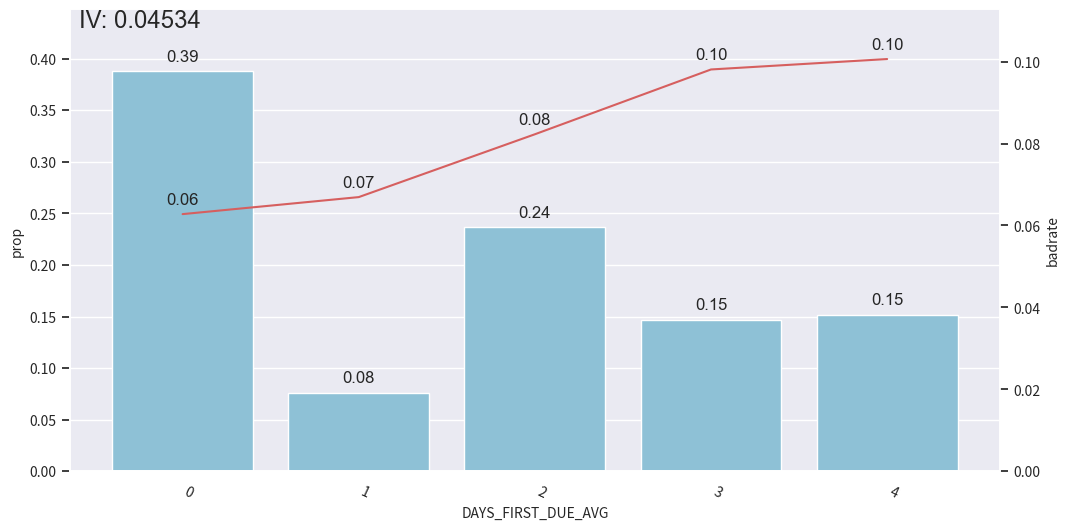

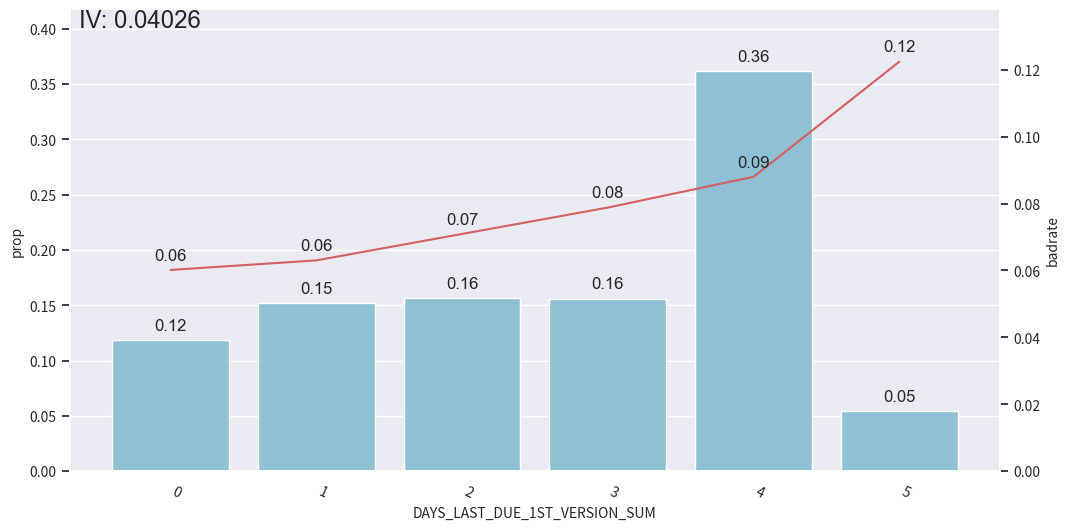

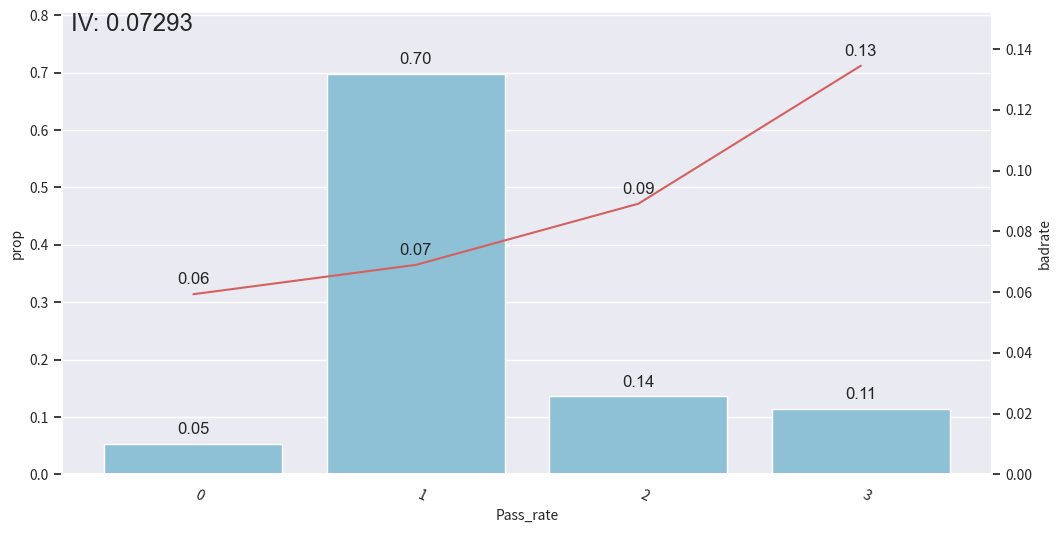

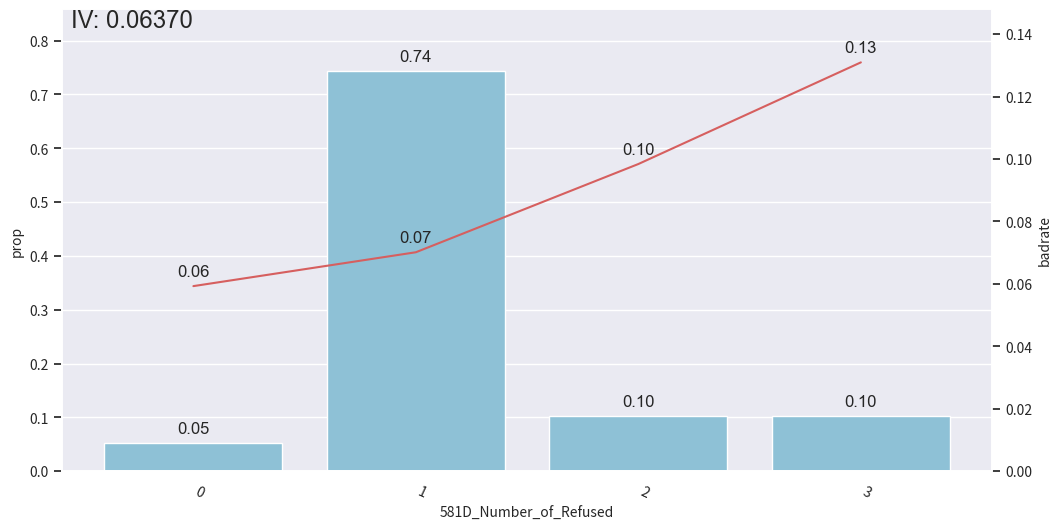

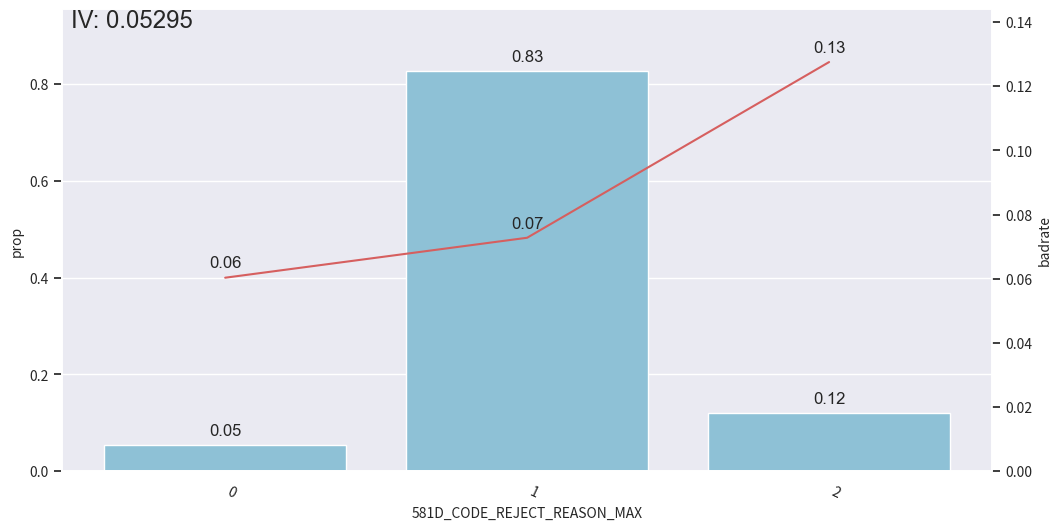

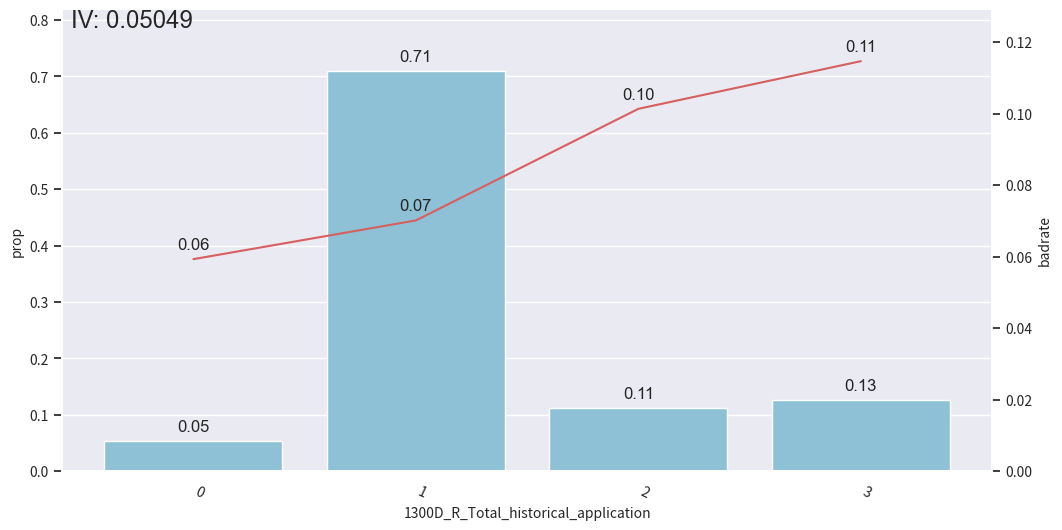

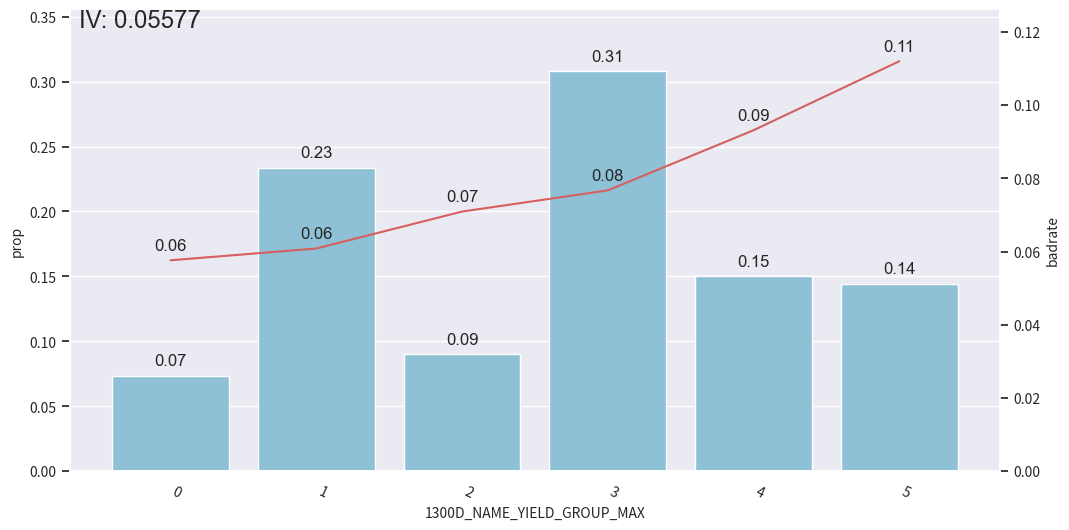

In [38]:
x_test_stp2 = combiner.transform(x_test_stp)
for i in lst:
    bin_plot(x_test_stp2, x=i, target=y_test)

In [87]:
x_train_stp2=combiner.transform(x_train_stp)
x_test_stp2 = combiner.transform(x_test_stp)

In [88]:
t=toad.transform.WOETransformer()
x_train_stp2_woe = t.fit_transform(x_train_stp2,y_train,exclude='SK_ID_CURR')
x_test_stp2_woe = t.transform(x_test_stp2[x_train_stp2.columns])

In [89]:
psi_df = toad.metrics.PSI(x_train_stp2_woe, x_test_stp2_woe).sort_values()
psi_df

SK_ID_CURR                              0.000000e+00
581D_CODE_REJECT_REASON_MAX             1.702223e-07
NAME_EDUCATION_TYPE                     2.528962e-06
REGION_RATING_CLIENT_W_CITY             1.170838e-05
OCCUPATION_TYPE                         1.679771e-05
PAYMENT_RATE                            2.869720e-05
NAME_INCOME_TYPE                        3.645383e-05
DAYS_BIRTH                              5.061470e-05
DAYS_FIRST_DRAWING_SUM                  5.309913e-05
DAYS_LAST_PHONE_CHANGE                  5.901933e-05
EXT_SOURCE_3                            6.674987e-05
EXT_SOURCE_2                            9.131428e-05
AMT_GOODS_PRICE                         9.765490e-05
EXT_SOURCE_1                            9.891092e-05
DAYS_EMPLOYED                           1.049343e-04
ORGANIZATION_TYPE                       1.164554e-04
DAYS_FIRST_DUE_AVG                      1.428310e-04
1300D_R_Total_historical_application    1.429528e-04
Pass_rate                               1.5778

In [41]:
psi_columns = psi_df[psi_df<0.13].index.to_list()
x_train_woe_psi = x_train_stp2_woe[psi_columns]
x_test_woe_psi = x_test_stp2_woe[psi_columns]
x_train_woe_psi.shape

(246008, 22)

In [92]:
x_train_woe_stp3,drop_list = toad.selection.select(x_train_stp2_woe,
target=y_train,
                                                  empty=0.5,
                                                  iv=0.04,
                                                  corr=0.6,
                                                  return_drop=True,
                                                  exclude='SK_ID_CURR')
print('保留特征:',x_train_woe_stp3.shape[1],'缺失删除:',len(drop_list['empty']),'低iv删除：',len(drop_list['iv']),'高相关删除：',len(drop_list['corr']))

保留特征: 18 缺失删除: 0 低iv删除： 0 高相关删除： 4


In [93]:
x_test_woe_stp3 = x_test_stp2_woe[x_train_woe_stp3.columns]

In [94]:
x_train_woe_stp4 = toad.selection.stepwise(x_train_woe_stp3,  
                                                  y_train,  
                                                  exclude='SK_ID_CURR',  
                                                  direction='both',   
                                                  criterion='ks',  
                                                  estimator='lr',
                                              intercept=False)
x_test_woe_stp4 = x_test_woe_stp3[x_train_woe_stp4.columns]
x_train_woe_stp4.shape

(246008, 5)

In [95]:
x_train_5=x_train_stp2_woe.drop('SK_ID_CURR',axis=1)
x_test_5 = x_test_stp2_woe[x_train_5.columns]

In [97]:
x_train_6=x_train_woe_stp3.drop('SK_ID_CURR',axis=1)
x_test_6=x_test_woe_stp3[x_train_6.columns]

In [99]:
x_train_7=x_train_woe_stp4.drop('SK_ID_CURR',axis=1)
x_test_7=x_test_woe_stp4[x_train_7.columns]

In [55]:
def lr_model(x, y, valx, valy, C):  
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve,roc_auc_score
    model = LogisticRegression(C=C, class_weight='balanced')      
    model.fit(x,y)
      
    y_pred = model.predict_proba(x)[:,1]  
    fpr_dev,tpr_dev,_ = roc_curve(y, y_pred)  
    train_ks = abs(fpr_dev - tpr_dev).max() 
    auc = roc_auc_score(y,y_pred)
    print('train_auc : ', auc)  
    print('train_ks : ', train_ks)  

    y_pred = model.predict_proba(valx)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(valy, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()   
    auc = roc_auc_score(valy,y_pred)
    print('val_auc : ', auc)
    print('val_ks : ', val_ks)  
    
      
    from matplotlib import pyplot as plt  
    plt.plot(fpr_dev, tpr_dev, label='dev')  
    plt.plot(fpr_val, tpr_val, label='val')  
    plt.plot([0,1], [0,1], 'k--')  
    plt.xlabel('False positive rate')  
    plt.ylabel('True positive rate')  
    plt.title('ROC Curve')  
    plt.legend(loc='best')  
    plt.show() 

In [56]:
def xgb_model(x, y, valx, valy):  
    import xgboost as xgb
    from sklearn.metrics import roc_curve,roc_auc_score
    model = xgb.XGBClassifier(learning_rate=0.05,  
                              n_estimators=400,  
                              max_depth=2,  
                              class_weight='balanced',  
                              min_child_weight=1,  
                              subsample=1,   
                              nthread=-1,  
                              scale_pos_weight=1,  
                              random_state=1,  
                              n_jobs=-1,  
                              reg_lambda=300)  
    model.fit(x, y)  
      
    y_pred = model.predict_proba(x)[:,1]  
    fpr_dev,tpr_dev,_ = roc_curve(y, y_pred)  
    train_ks = abs(fpr_dev - tpr_dev).max()  
    auc = roc_auc_score(y,y_pred)
    print('train_auc : ', auc)  
    print('train_ks : ', train_ks)  
    
    
    
    y_pred = model.predict_proba(valx)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(valy, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    auc = roc_auc_score(valy,y_pred)
    print('val_auc : ', auc)  
    print('val_ks : ', val_ks)  


    from matplotlib import pyplot as plt  
    plt.plot(fpr_dev, tpr_dev, label='dev')
    plt.plot(fpr_val, tpr_val, label='val') 
    plt.plot([0,1], [0,1], 'k--')  
    plt.xlabel('False positive rate')  
    plt.ylabel('True positive rate')  
    plt.title('ROC Curve')  
    plt.legend(loc='best')  
    plt.show()

In [57]:
def bi_train(x,y,valx,valy):  
    # 逻辑回归正向
    print("逻辑回归正向：")
    lr_model(x, y, valx, valy,0.1)
    # XGBoost正向
    print("XGBoost正向：")
    xgb_model(x, y, valx, valy) 

逻辑回归正向：
train_auc :  0.502686516564394
train_ks :  0.007291665504567779
val_auc :  0.5003769517404214
val_ks :  0.009358392456540354


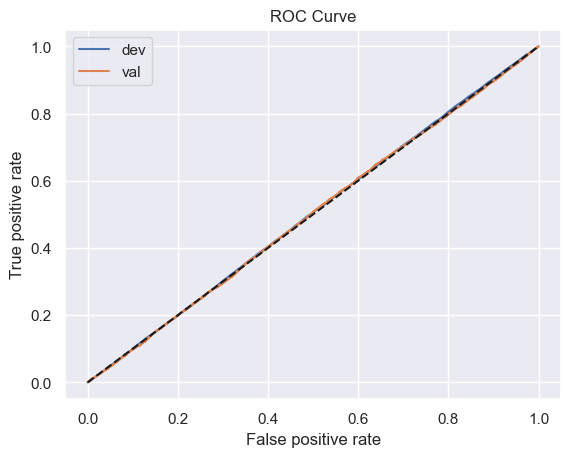

XGBoost正向：


C:\Users\melx99\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:33:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


train_auc :  0.7572361276911267
train_ks :  0.3837830093861998
val_auc :  0.7497370239890672
val_ks :  0.37835389363310634


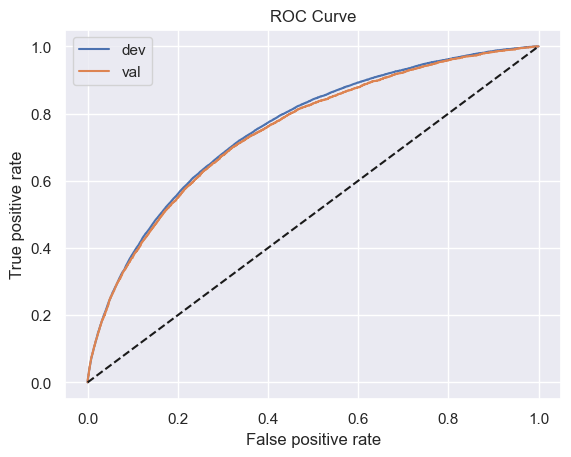

In [102]:
bi_train(x_train_stp2_woe,y_train,x_test_stp2_woe,y_test)

In [75]:
x_train_5=x_train_stp2_woe.drop('SK_ID_CURR',axis=1)
x_test_5 = x_test_stp2_woe[x_train_5.columns]

train_auc :  0.7520891338670116
train_ks :  0.377123728444659
val_auc :  0.7468157337379856
val_ks :  0.3758826634020671


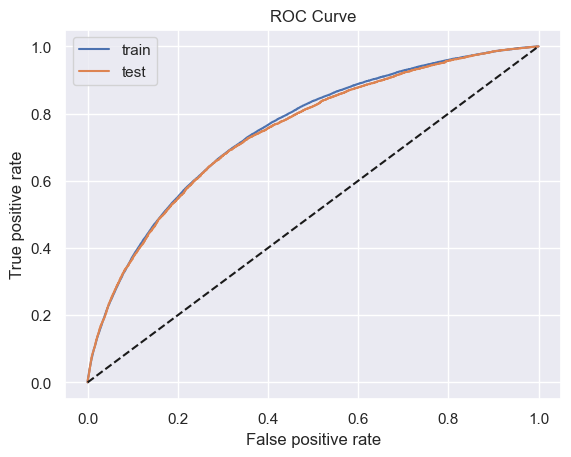

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
model = LogisticRegression(C=0.1, class_weight='balanced',max_iter=1000)      
model.fit(x_train_5,y_train)
  
y_pred = model.predict_proba(x_train_5)[:,1]  
fpr_dev,tpr_dev,_ = roc_curve(y_train, y_pred)  
train_ks = abs(fpr_dev - tpr_dev).max() 
auc = roc_auc_score(y_train,y_pred)
print('train_auc : ', auc)  
print('train_ks : ', train_ks)  

y_pred = model.predict_proba(x_test_5)[:,1]  
fpr_val,tpr_val,_ = roc_curve(y_test, y_pred)  
val_ks = abs(fpr_val - tpr_val).max()   
auc = roc_auc_score(y_test,y_pred)
print('val_auc : ', auc)
print('val_ks : ', val_ks)  


  
from matplotlib import pyplot as plt  
plt.plot(fpr_dev, tpr_dev, label='train')  
plt.plot(fpr_val, tpr_val, label='test')  
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel('False positive rate')  
plt.ylabel('True positive rate')  
plt.title('ROC Curve')  
plt.legend(loc='best')  
plt.show() 

In [110]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
param_grid = {'C':[0.01,0.1,1,10],'penalty':['l1','l2'],'solver':['liblinear']}
grd = GridSearchCV(estimator=model,param_grid=param_grid,scoring='roc_auc',cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22),n_jobs=-1,refit=True,verbose=1)
grd.fit(x_train_5,y_train)
print('最优参数:',grd.best_params_)
print('最优AUC:',grd.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
最优参数: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
最优AUC: 0.7517776541060828


In [112]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_5,y_train)
dtc_y_pred=dtc.predict_proba(x_train_5)[:,1]

fpr_dev,tpr_dev,_ = roc_curve(y_train, dtc_y_pred)  
train_ks = abs(fpr_dev - tpr_dev).max() 
auc = roc_auc_score(y_train,dtc_y_pred)
print('train_auc : ', auc)  
print('train_ks : ', train_ks)  

y_pred = dtc.predict_proba(x_test_5)[:,1]  
fpr_val,tpr_val,_ = roc_curve(y_test, y_pred)  
val_ks = abs(fpr_val - tpr_val).max()   
auc = roc_auc_score(y_test,y_pred)
print('val_auc : ', auc)
print('val_ks : ', val_ks) 

dtc.score(x_test_5,y_test)

train_auc :  0.9999961510177499
train_ks :  0.9985447157153685
val_auc :  0.550031997846924
val_ks :  0.10047721608749763


0.848592751573094

In [117]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = {"n_estimators":[600,700,800,900], "max_depth": [12],"random_state":[9]}
grd = GridSearchCV(estimator=rfc,param_grid=param_grid,scoring='roc_auc',cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22),n_jobs=-1,refit=True,verbose=1)
grd.fit(x_train_5,y_train)
print('最优参数:',grd.best_params_)
print('最优AUC:',grd.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
最优参数: {'max_depth': 12, 'n_estimators': 900, 'random_state': 9}
最优AUC: 0.7522115996817226
